<a href="https://colab.research.google.com/github/mahikkaaa/Secure-Tomorrow-SDG-16/blob/main/Secure_Tomorrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Suicidal Behaviours among Adolescents



The Global School-based Student Health Survey is designed to provide accurate data on health behaviours and protective factors among students to:  
> 1)	help countries develop priorities, establish programs, and advocate for resources for school health and youth health programs and policies  
> 2)	allow international agencies, countries, and others to make comparisons across countries regarding the prevalence of health behaviors and protective factors  
> 3)	establish trends in the prevalence of health behaviors and protective factors by country for use in evaluation of school health and youth health promotion.  

The GSHS is a school-based survey conducted primarily among students aged 13–17 years using a standardized scientific sample selection process, common school-based methodology and self-administered questionnaire, which can be completed during one regular class period.



Countries develop their country-specific questionnaire using the standardized core and core-expanded questions, to which they may add country-specific questions. More detail on the questionnaire is available on the GSHS questionnaire page. The questions are translated into the appropriate language of instruction for the students and pilot tested for comprehension. All questions share common characteristics to enhance the flow of the survey and comprehension by the student. To help protect student privacy, no skip patterns are allowed.

GSHS data are owned by the official country-level agency (ex. ministry of health) conducting or sponsoring the survey public health and scientific advancement are best served by an open and timely exchange of data and data analyses. The privacy of participating schools and students must be protected. Data quality must be maintained.

The Global school-based student health survey (GSHS) is a collaborative surveillance project designed to help countries measure and assess the behavioral risk factors and protective factors among young people aged 13 to 17 years. WHO provides technical support to countries throughout the planning and implementation of their survey including:

1) help with questionnaire development

2) help with sample design and selection

3) training of Survey Coordinators and progamme planners

4) provision of survey implementation handbooks and other materials

5) provision and scanning of computer-scannable answer sheets

6) data editing and weighting

7) provision/facilitation of funding and resources to assist countries.


### Importing Libraries

**Numpy**  

It provides various data structures and operations for manipulating numerical data and time series. This library is built on top of the NumPy library.

**Pandas**  

It is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. It provides various data structures and operations for manipulating numerical data and time series. This library is built on top of the NumPy library. Pandas is fast and it has high performance & productivity for users.




**Matplotlib**  

Matplotlib is easy to use and an amazing visualizing library in Python. It is built on NumPy arrays and designed to work with the broader SciPy stack and consists of several plots like line, bar, scatter, histogram, etc.

**Seaborn**  

Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. It is built on the top of matplotlib library and also closely integrated to the data structures from pandas.

**Scipy**  

SciPy is a python library that is useful in solving many mathematical equations and algorithms. It is designed on the top of Numpy library that gives more extension of finding scientific mathematical formulae like Matrix Rank, Inverse, polynomial equations, LU Decomposition, etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
#directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline
import seaborn as sns
from scipy.stats import kurtosis

### Data Collection

This data set is created by collected from the GSHS- Global School-based Student Health Survey of adolescents based on Gender from 26 countries. It has selected questions and provides percentage of each gender with age for each factor, there are 10 core modules which have several sub-modules.
The GSHS questionnaire is comprised of 10 core modules addressing the leading causes of morbidity and mortality among children and adults worldwide:  
> -alcohol use  
> -dietary behaviours  
> -drug use  
> -hygiene  
> -mental health  
> -physical activity  
> -protective factors  
> -sexual behaviours  
> -tobacco use  
> -violence and unintentional injury  



In [ ]:
df_orig = pd.read_csv("/content/GHSH_Pooled_Data1.csv")

#Make a copy of this object’s indices and data.
#When deep=True (default), a new object will be created with a copy of the calling object’s data and indices.
#Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).
df = df_orig.copy()

#Print a concise summary of a DataFrame.
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           106 non-null    object 
 1   Year                              106 non-null    int64  
 2   Age Group                         106 non-null    object 
 3   Sex                               106 non-null    object 
 4   Currently_Drink_Alcohol           106 non-null    float64
 5   Really_Get_Drunk                  106 non-null    float64
 6   Overwieght                        106 non-null    float64
 7   Use_Marijuana                     106 non-null    float64
 8   Have_Understanding_Parents        106 non-null    float64
 9   Missed_classes_without_permssion  106 non-null    float64
 10  Had_sexual_relation               106 non-null    float64
 11  Smoke_cig_currently               104 non-null    float64
 12  Had_figh

### Understanding the Data


In [ ]:
#Return a tuple representing the dimensionality of the DataFrame.
df.shape

(106, 17)

In [ ]:
# returns the first n rows(observe the index values). The default number of elements to display is five
df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


In [ ]:
#returns the last n rows(observe the index values)
df.tail()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
101,Vanuatu,2011,13-15,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
102,Wallis and Futuna,2015,13-15,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
103,Wallis and Futuna,2015,13-15,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
104,Wallis and Futuna,2015,16-17,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0
105,Wallis and Futuna,2015,16-17,Female,42.9,51.7,70.6,3.9,37.8,37.2,22.4,41.7,17.3,29.4,30.4,1.5,16.2


In [ ]:
#To access the names of a Pandas dataframe
df.columns

Index(['Country', 'Year', 'Age Group', 'Sex', 'Currently_Drink_Alcohol',
       'Really_Get_Drunk', 'Overwieght', 'Use_Marijuana',
       'Have_Understanding_Parents', 'Missed_classes_without_permssion',
       'Had_sexual_relation', 'Smoke_cig_currently', 'Had_fights', 'Bullied',
       'Got_Seriously_injured', 'No_close_friends', 'Attempted_suicide'],
      dtype='object')

In [ ]:
#Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,104.000000,106.000000,102.000000,106.000000,106.000000,106.000000
mean,2014.698113,31.815094,22.496226,23.694340,7.642453,33.190566,29.996226,26.679245,15.546154,32.448113,31.109804,43.723679,7.744340,14.452830
std,2.089292,53.454089,16.553129,15.764075,8.713536,11.559408,10.786728,17.401318,10.748501,15.297701,14.185479,14.808421,4.365254,9.273621
min,2010.000000,1.400000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,2.700000
25%,2013.000000,11.550000,9.000000,11.400000,2.025000,25.825000,22.450000,12.600000,7.050000,20.750000,21.775000,34.800000,4.500000,9.400000
50%,2015.000000,26.000000,19.650000,21.800000,4.350000,33.400000,28.950000,22.350000,12.600000,29.650000,27.550000,41.400000,6.950000,11.850000
75%,2016.000000,42.350000,30.475000,31.850000,9.575000,40.850000,36.825000,37.100000,22.000000,42.700000,41.150000,53.150000,9.700000,18.425000
max,2018.000000,548.000000,80.200000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,67.200000


### Preprocessing

#### Data Cleaning

Data cleansing or data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [ ]:
#checking for empty values
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 2
Had_fights                          0
Bullied                             4
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

We, see that we have a total of 6 missing values in 2 of the columns. To be precise, 2 missing records in the column Smoke_cig_currently and 4 missing records in the column Bullied.


<Axes: >

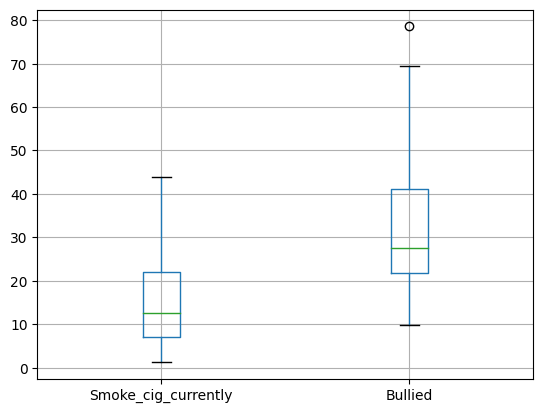

In [ ]:
bp = df.boxplot(column=['Smoke_cig_currently', 'Bullied'])
bp

We can see these duplicates from the summary statistics as well.
Now, let us treat these NA’s by imputing them with mean(incase of no outliers) or median otherwise.

In [ ]:
df['Bullied'] = df['Bullied'].fillna(df['Bullied'].median())
df['Smoke_cig_currently'] = df['Smoke_cig_currently'].fillna(df['Smoke_cig_currently'].mean())

In [ ]:
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 0
Had_fights                          0
Bullied                             0
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

In [ ]:
df['Country'].value_counts()

Argentina               6
Samoa                   6
Vanuatu                 6
Mongolia                6
Brunei Darussalam       4
Namibia                 4
Benin                   4
Trinidad and Tobago     4
Timor-Leste             4
Thailand                4
Suriname                4
Seychelles              4
Bhutan                  4
Dominican Republic      4
Nepal                   4
Mauritus                4
Malaysia                4
Laos                    4
Jamaica                 4
Indonesia               4
Fiji Islands            4
Wallis and Futuna       4
Barabados               2
Peru                    2
Kiribati                2
Tuvalu                  2
Uruguay                 2
Name: Country, dtype: int64

#### Data Redundancy

Data redundancy occurs when the same piece of data exists in multiple places, whereas data inconsistency is when the same data exists in different formats in multiple tables. Unfortunately, data redundancy can cause data inconsistency, which can provide a company with unreliable and/or meaningless information.

In [ ]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

We see no duplicate values to be dealt with. Good riddance!

### Data Analysis and Visualization

Data analysis is the methodical application of logical and/or statistical approaches to describe and demonstrate, summarize and assess, and evaluate data.

The appropriate and accurate analysis of study findings is a crucial part of preserving data integrity. Inadequate statistical analyses distort scientific results, confuse lay readers, and may have a detrimental impact on how the general public views research.


#### Univariate Analysis


Univariate analysis is the simplest form of analyzing data. Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately.

###### Numerical Data

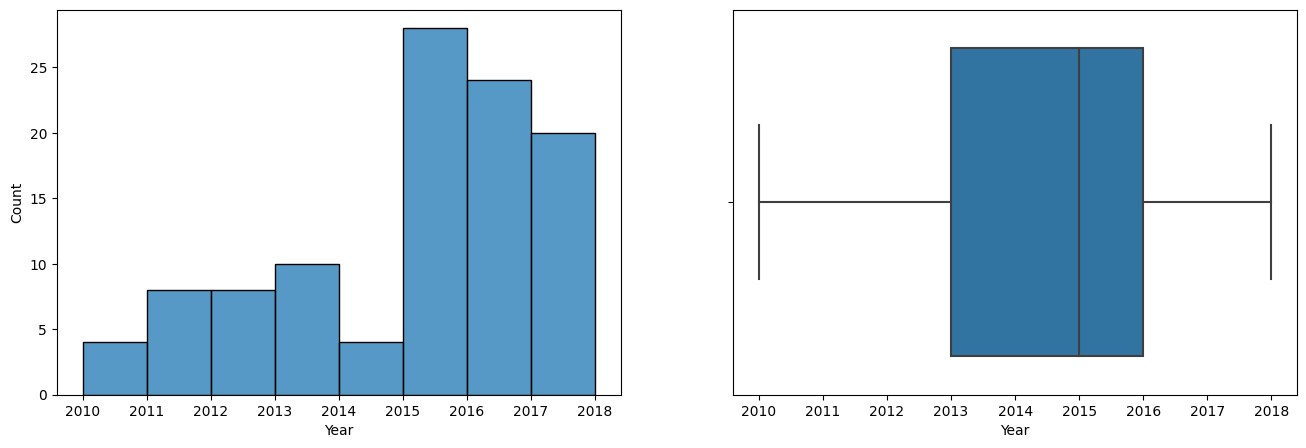

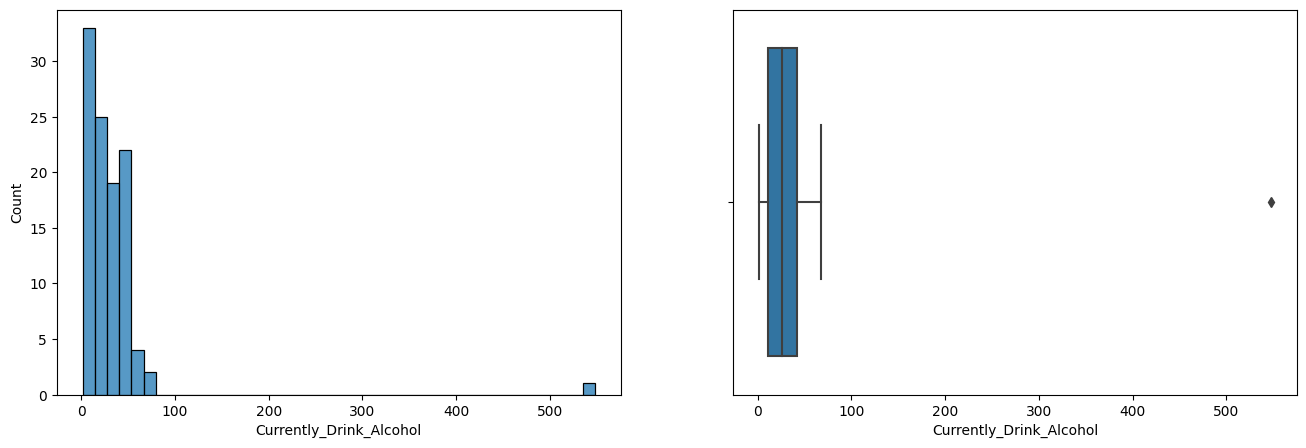

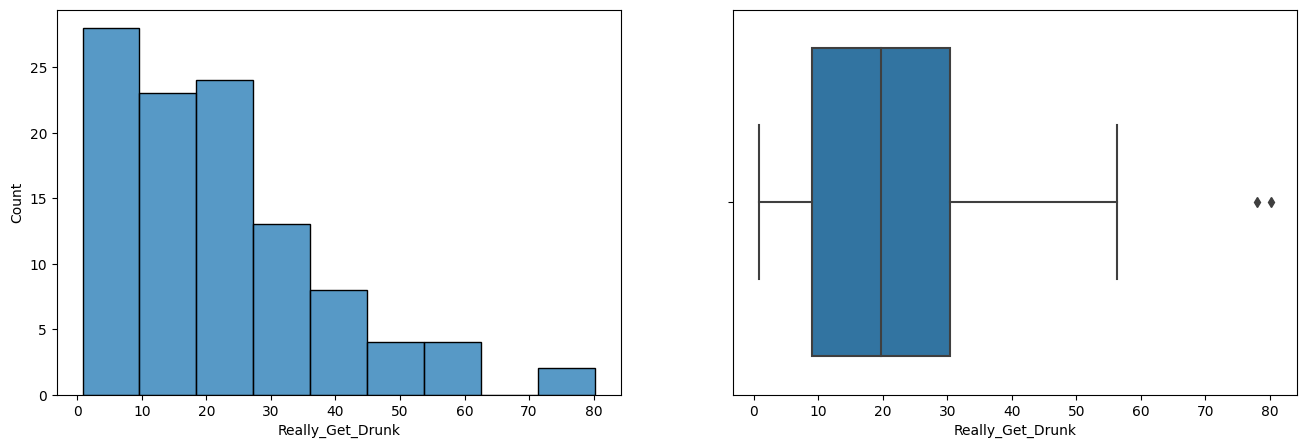

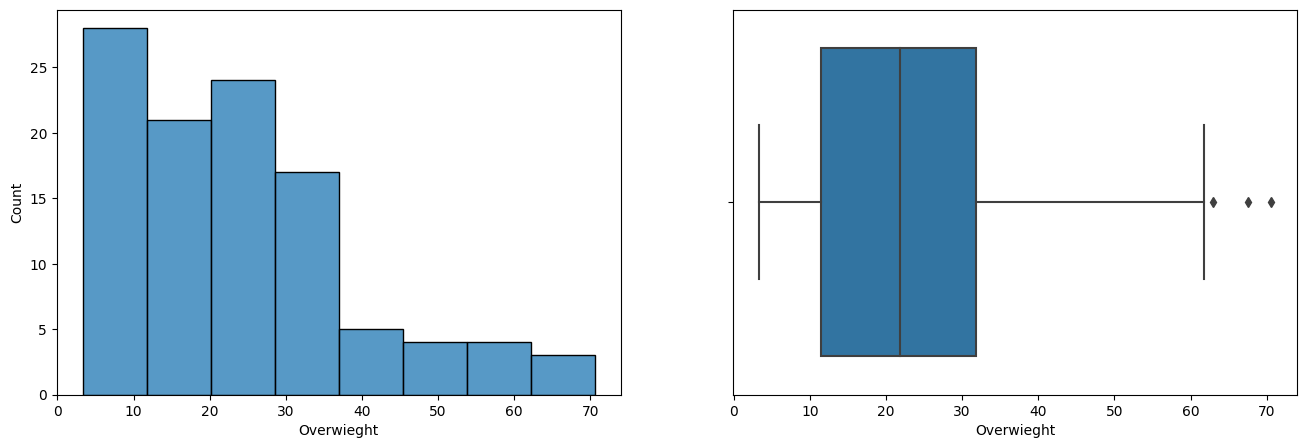

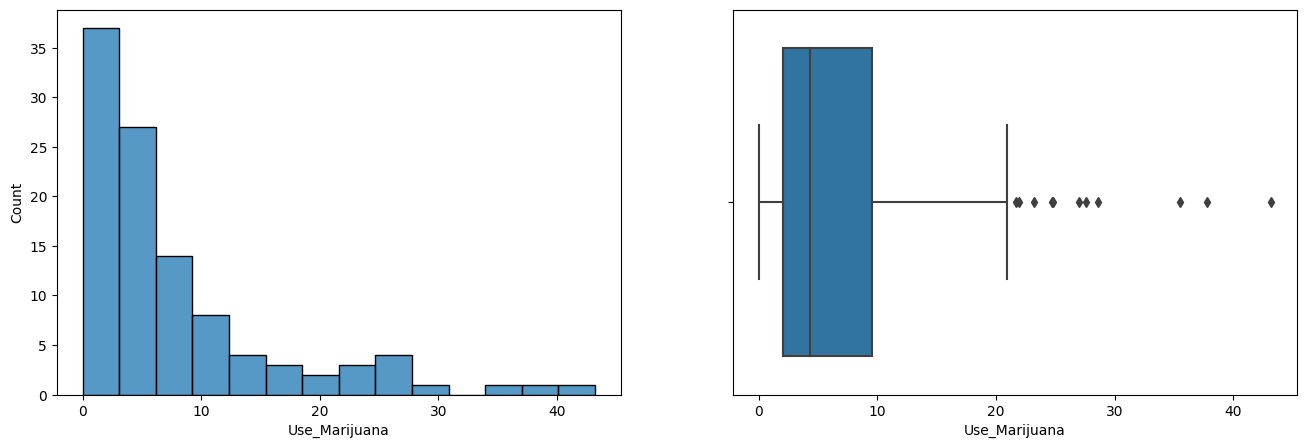

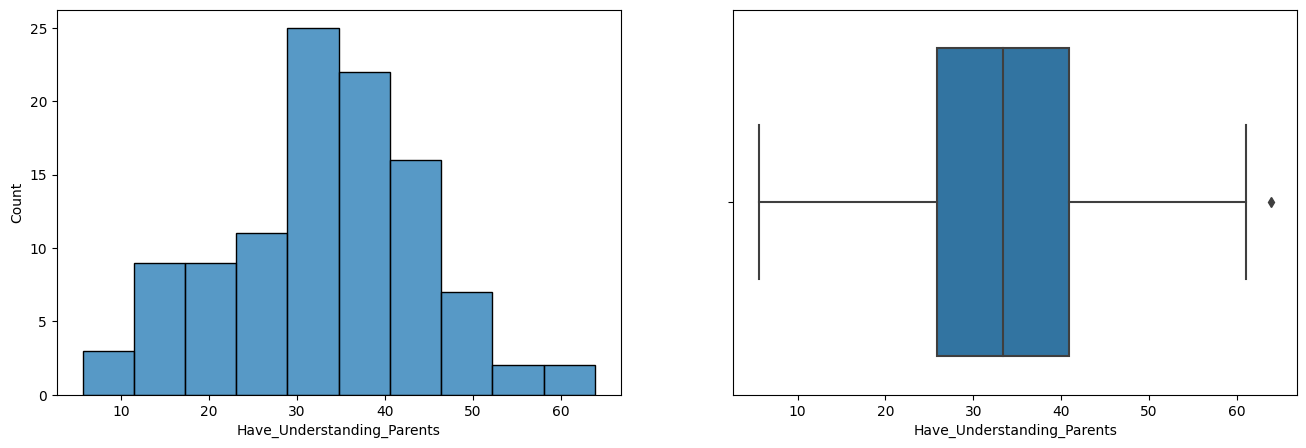

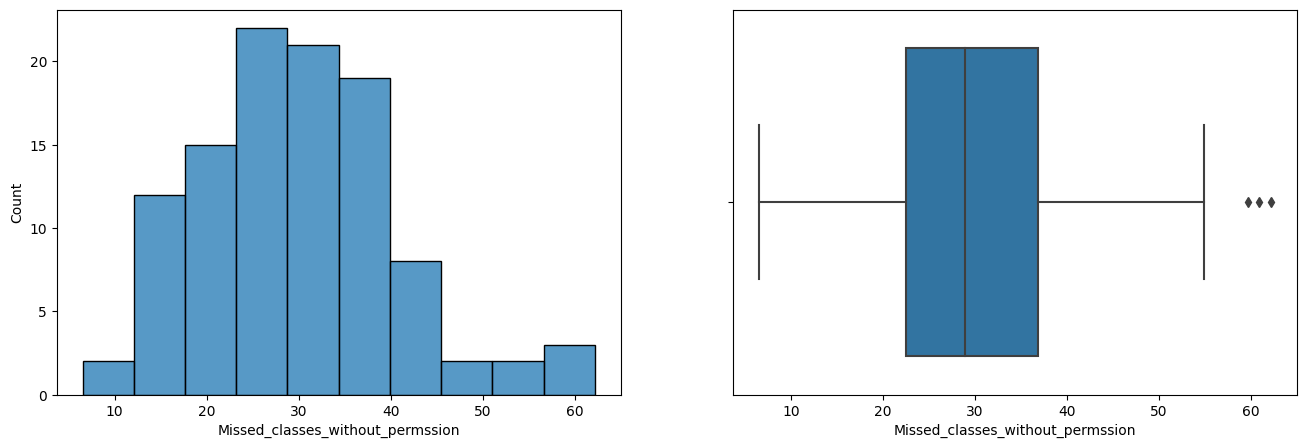

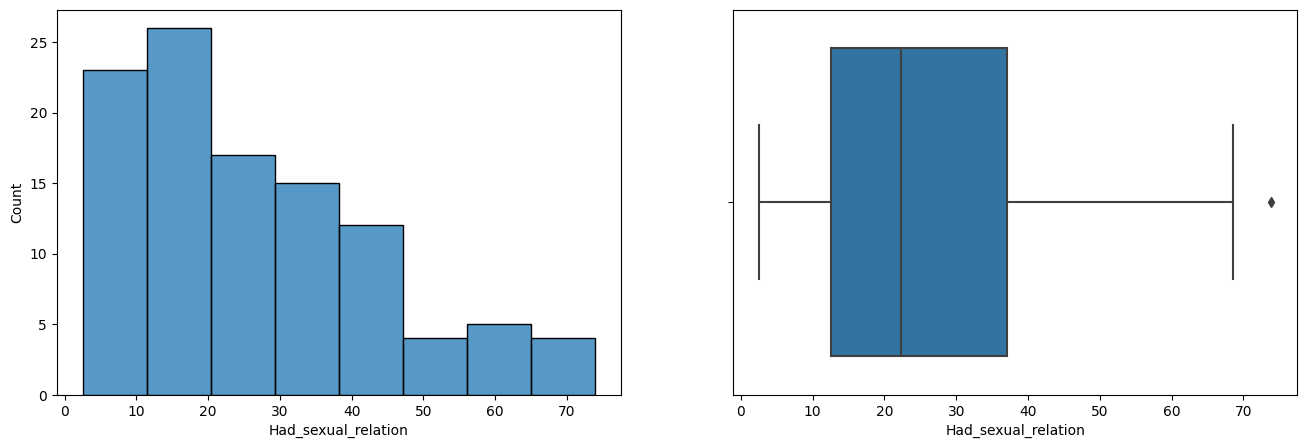

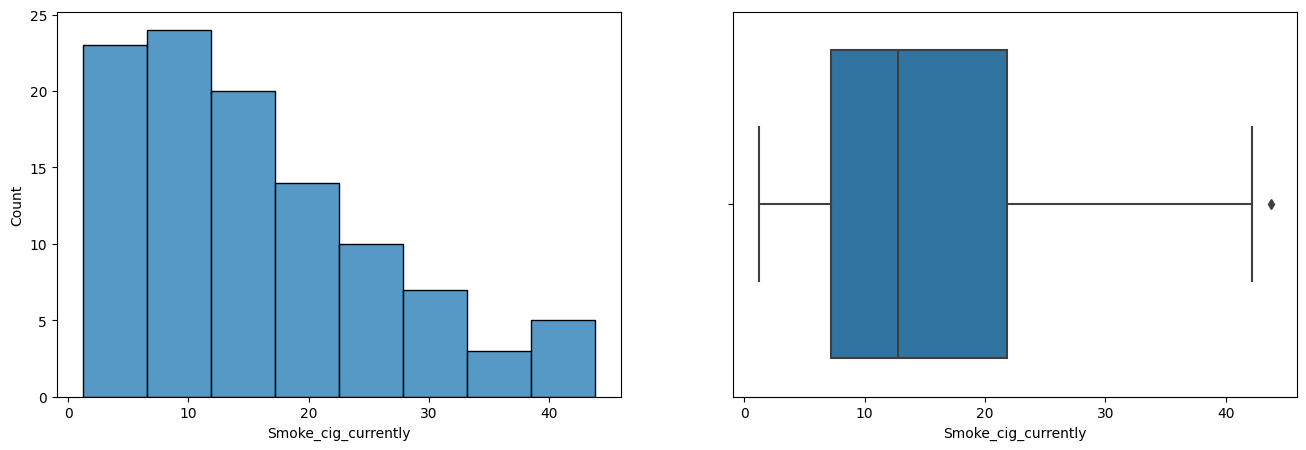

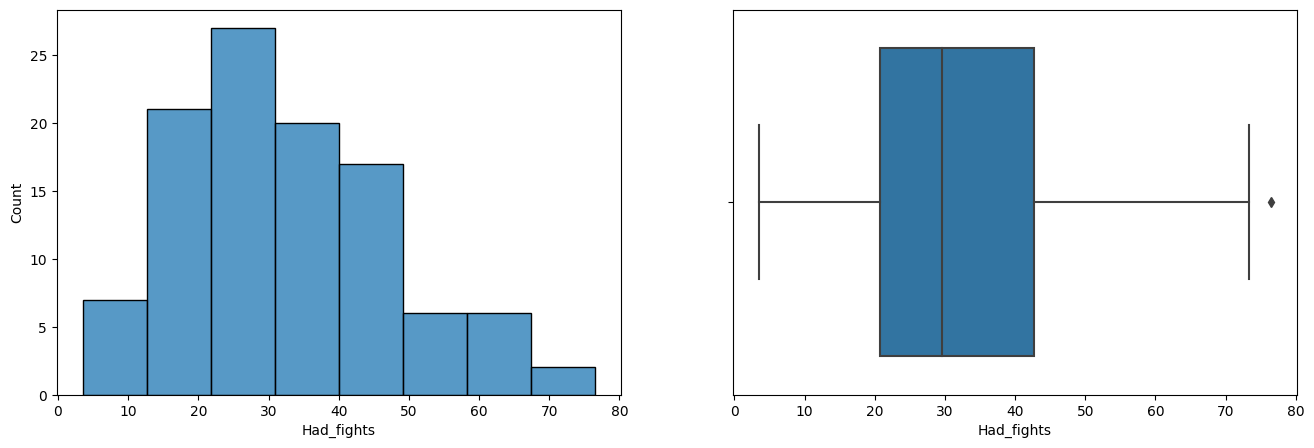

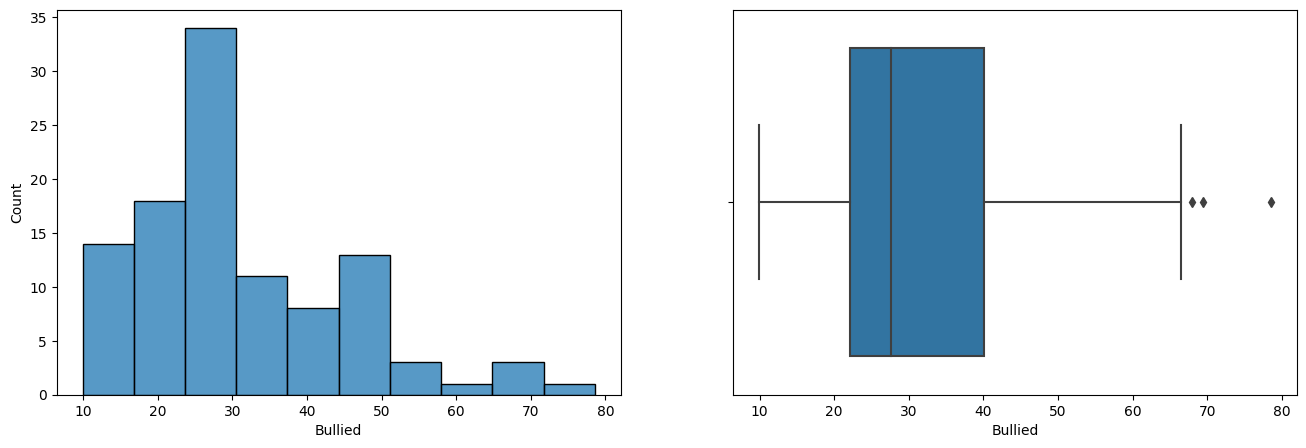

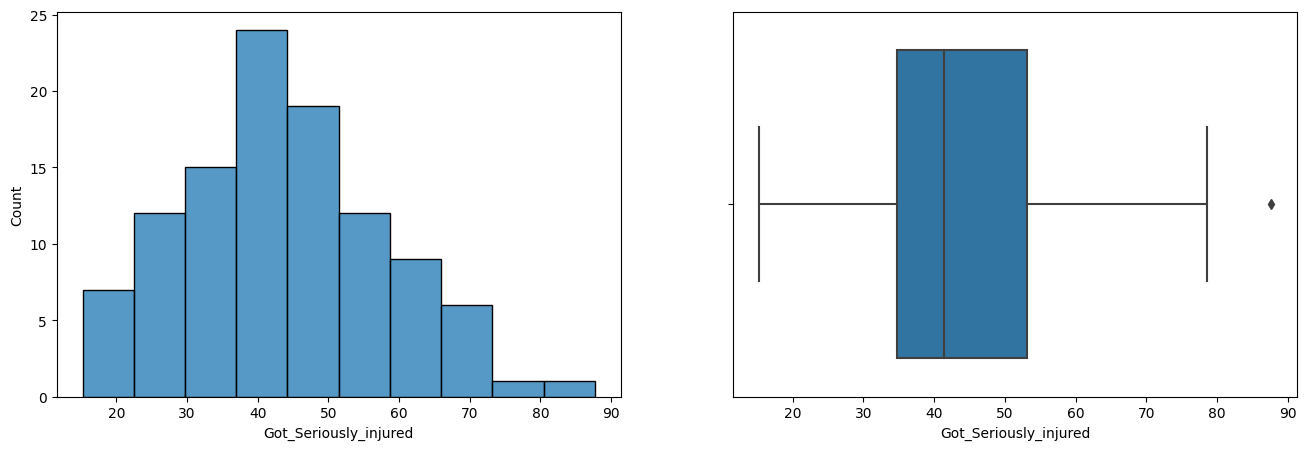

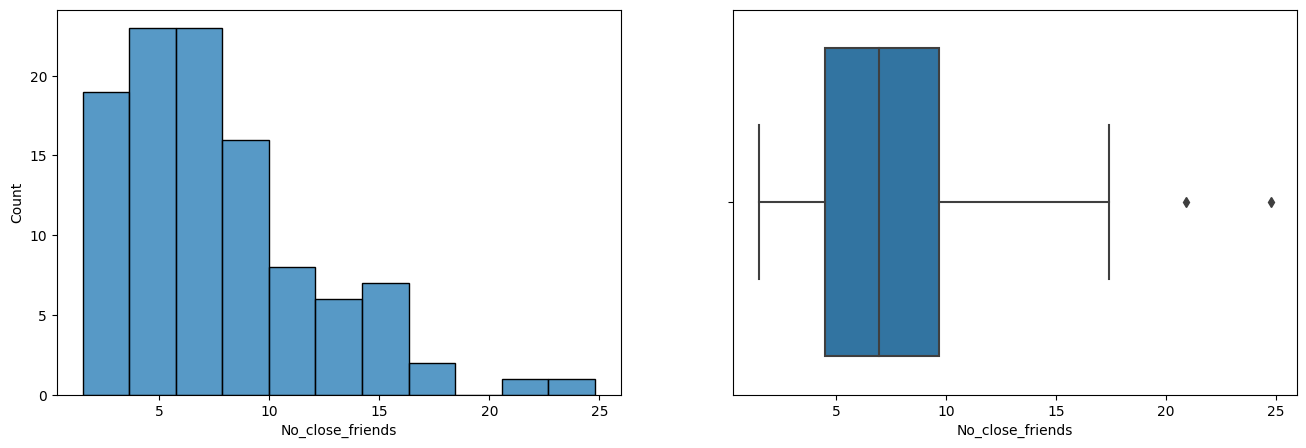

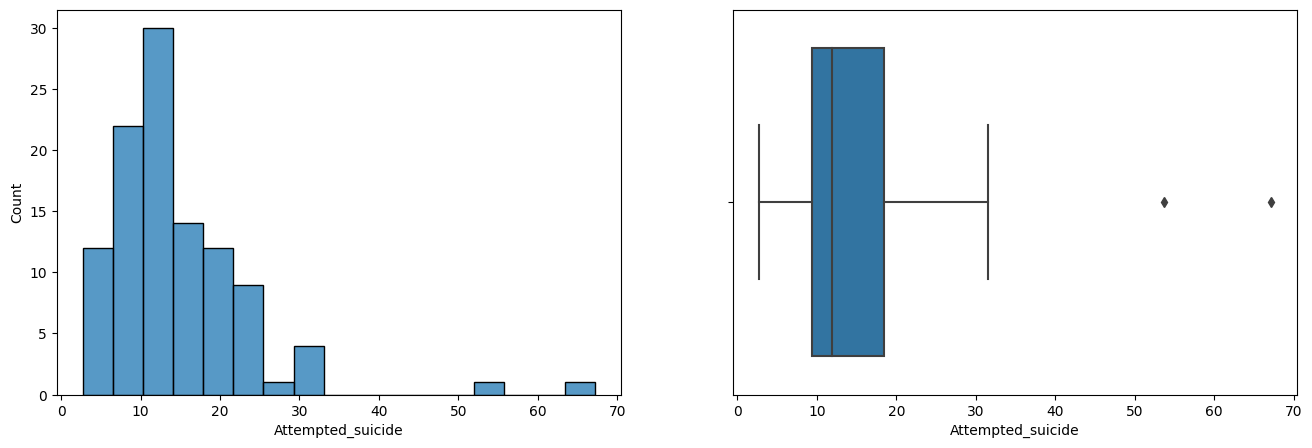

In [ ]:
df_num = df.select_dtypes(exclude=object)
for col in df_num.columns:
  fig, ax = plt.subplots(1, 2, figsize=(16,5))
  sns.histplot(data=df_num, x=col, ax=ax[0])
  sns.boxplot(data=df_num, x=col, ax=ax[1])

**INFERENCE**  

> 1)	Most of the numerical variables have positively skewed distribution meaning that the tail of a distribution curve is longer on the right side and that most of the scores are below the mean (i.e., most of the scores are low). It also indicates that: the mean, mode, and median are not equal; the mode is low.  
> 2)	A few of the numerical variables are normally distributed meaning that the distribution is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.


**Measuring Skewness**

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

If coefficient skewness is more than 0.5 or less than -.05 then it is positively skewed.

In [ ]:
for col in df_num.columns:
  sk = df_num[col].skew(axis = 0, skipna = True)
  if (sk > 0.5) or (sk< -0.5):
    print(col," with ",sk," is positively skewed! ")
  else:
    print(col, " with ", sk, " is normal!")

Year  with  -0.6747829667213993  is positively skewed! 
Currently_Drink_Alcohol  with  8.72240011821513  is positively skewed! 
Really_Get_Drunk  with  1.0681357097128723  is positively skewed! 
Overwieght  with  1.0217711927881141  is positively skewed! 
Use_Marijuana  with  1.9551260406876132  is positively skewed! 
Have_Understanding_Parents  with  -0.07823155633489849  is normal!
Missed_classes_without_permssion  with  0.6622276079014395  is positively skewed! 
Had_sexual_relation  with  0.8350487256553063  is positively skewed! 
Smoke_cig_currently  with  0.7976513931202183  is positively skewed! 
Had_fights  with  0.6013390001733574  is positively skewed! 
Bullied  with  1.025024010030998  is positively skewed! 
Got_Seriously_injured  with  0.3769107550230587  is normal!
No_close_friends  with  1.1378773150825803  is positively skewed! 
Attempted_suicide  with  2.6330983026478987  is positively skewed! 


**Measuring Kurtosis**

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution. Distributions with medium kurtosis (medium tails) are mesokurtic. Distributions with low kurtosis (thin tails) are platykurtic.

> 1) Leptokurtic(>3) is having very long and skinny tails, which means there are more chances of outliers  
> 2) Platykurtic(<3) is having a lower tail and stretched around center tails means most of the data points are present in high proximity with mean  
> 3) Mesokurtic(=3) is the same as the normal distribution, which means kurtosis is near to 0.


In [ ]:
for col in df_num.columns:
  kt = kurtosis(df_num[col], axis=0, bias=True)
  if kt > 3:
    print(col," with ",kt," is Leptokurtic! Higher chance of outliers!")
  elif kt < 3:
    print(col," with ",kt," is Platykurtic! Medium chance of outliers!")
  else:
    print(col," with ",kt," is Mesokurtic! No chance of outliers!")

Year  with  -0.5038731521850748  is Platykurtic! Medium chance of outliers!
Currently_Drink_Alcohol  with  80.62752755626853  is Leptokurtic! Higher chance of outliers!
Really_Get_Drunk  with  1.1341720087526914  is Platykurtic! Medium chance of outliers!
Overwieght  with  0.5931617297110803  is Platykurtic! Medium chance of outliers!
Use_Marijuana  with  3.6252171439762817  is Leptokurtic! Higher chance of outliers!
Have_Understanding_Parents  with  -0.18424241927812668  is Platykurtic! Medium chance of outliers!
Missed_classes_without_permssion  with  0.5396513226583868  is Platykurtic! Medium chance of outliers!
Had_sexual_relation  with  -0.18958256140966867  is Platykurtic! Medium chance of outliers!
Smoke_cig_currently  with  -0.10753296282744262  is Platykurtic! Medium chance of outliers!
Had_fights  with  0.009194109164273545  is Platykurtic! Medium chance of outliers!
Bullied  with  0.8792488056480527  is Platykurtic! Medium chance of outliers!
Got_Seriously_injured  with  -0.

###### Caegorical Data

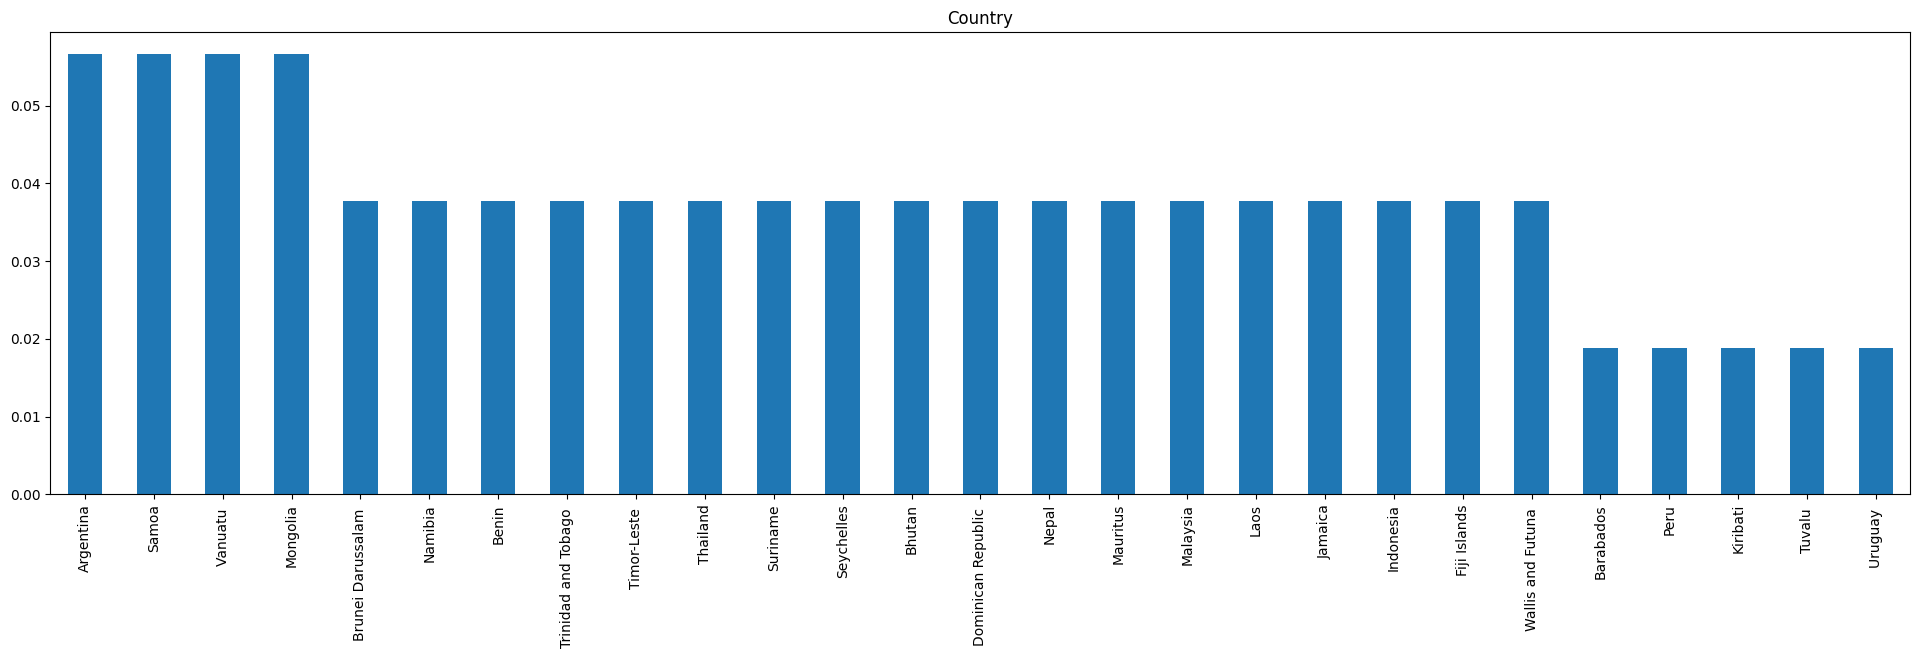

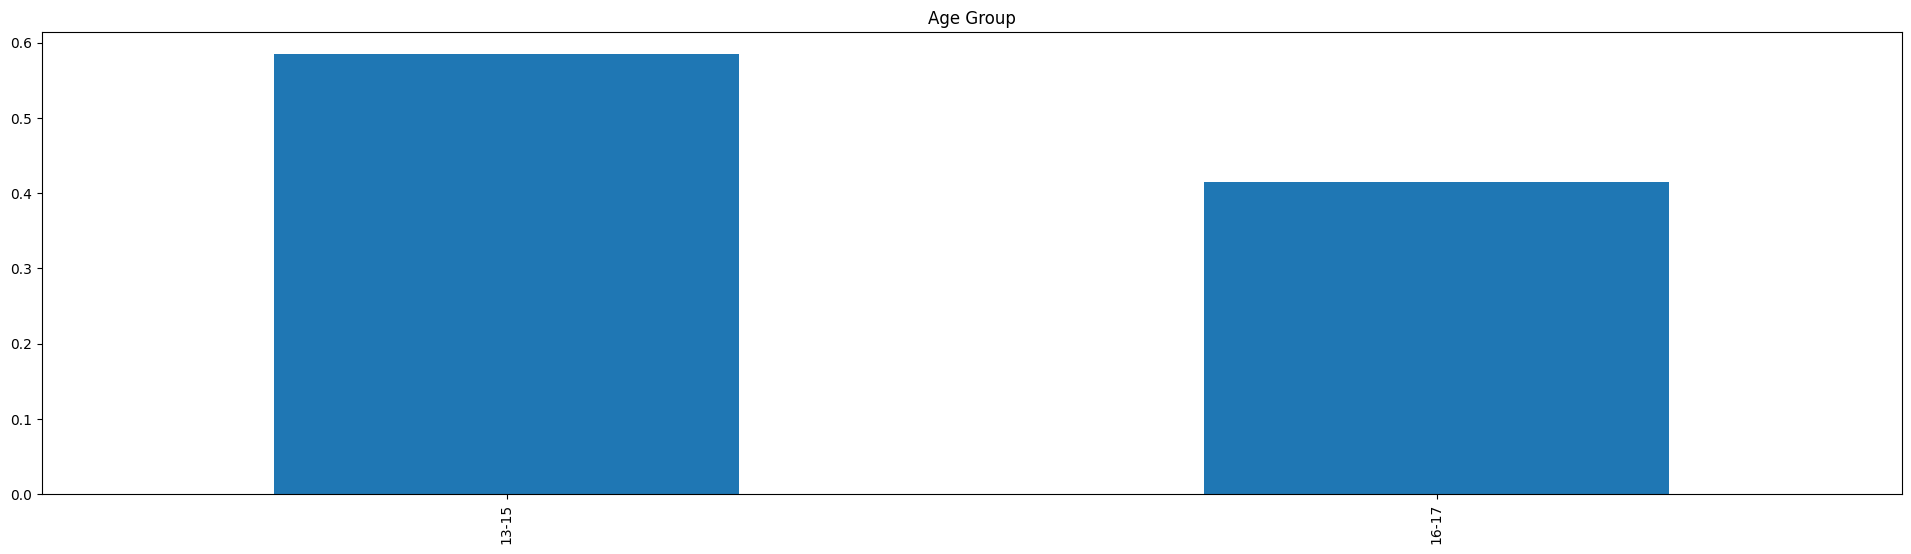

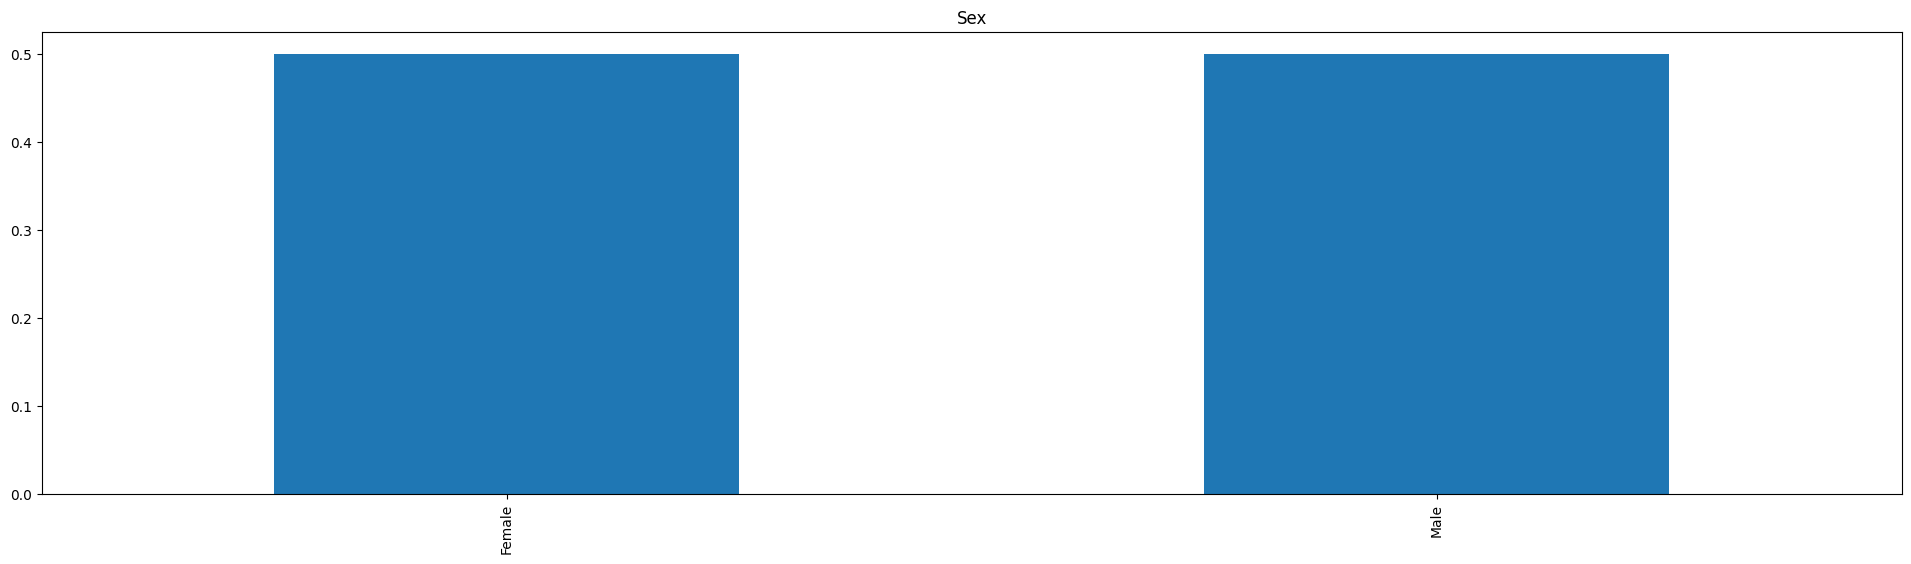

In [ ]:
df_cat = df.select_dtypes(include=object)
for col in df_cat.columns:
  fig, ax = plt.subplots(1, 1, figsize=(16,5))
  df_cat[col].value_counts(normalize=True).plot.bar(figsize = (24,6), title=col)

**INFERENCE**  

> 1)	More number of records from the year 2015 to 2018.  
> 2)	Only two age groups where more number of records are from the 13-15 years of age group.  
> 3)	Almost similar number of observations recorded from females and males.  
> 4)	Records from around 27 different countries.


#### Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.

Our output variable as in class label is the column Attempted_suicide which determines the rate of suicidal behavior in an individual.

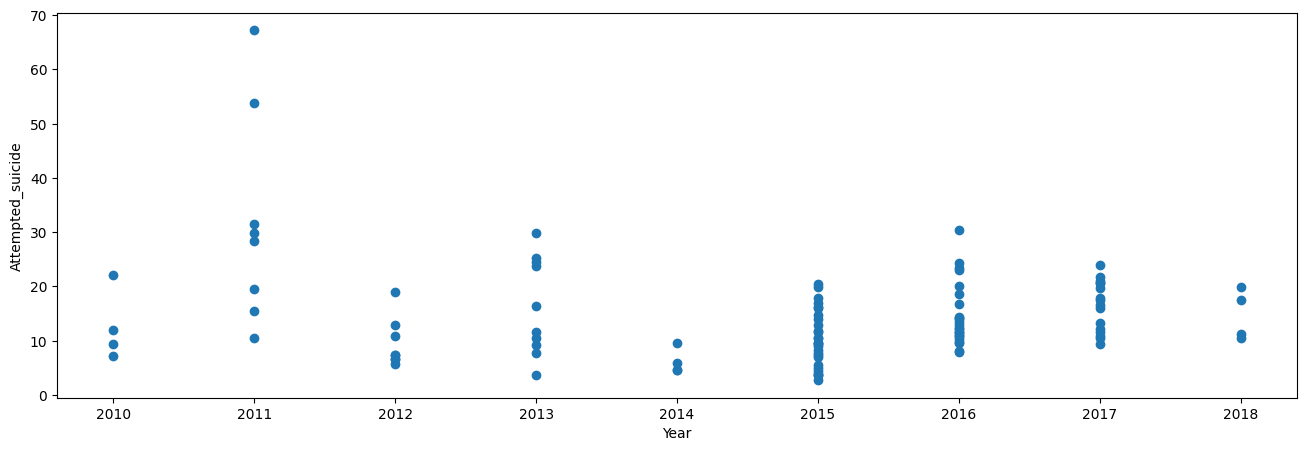

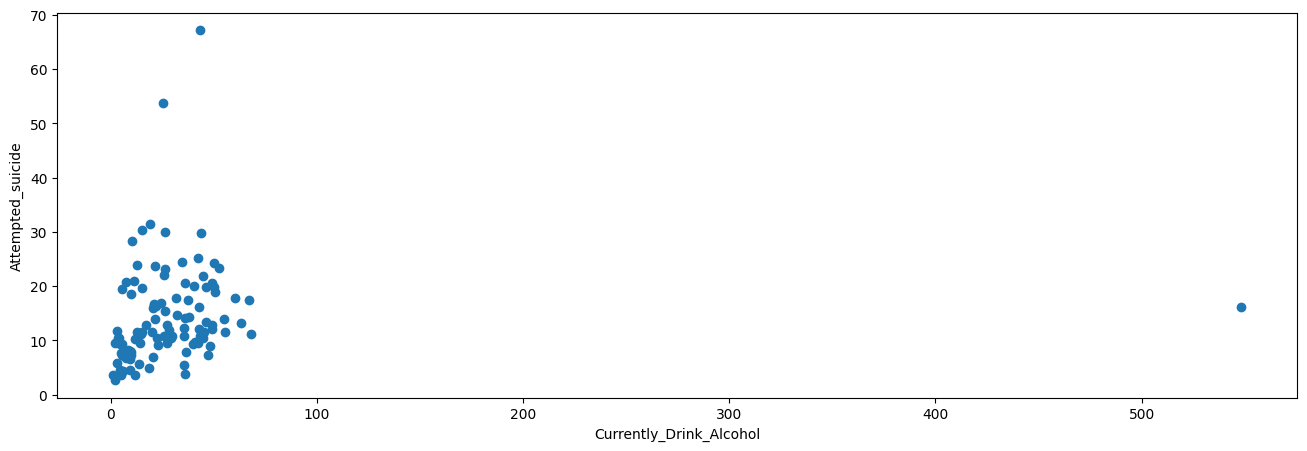

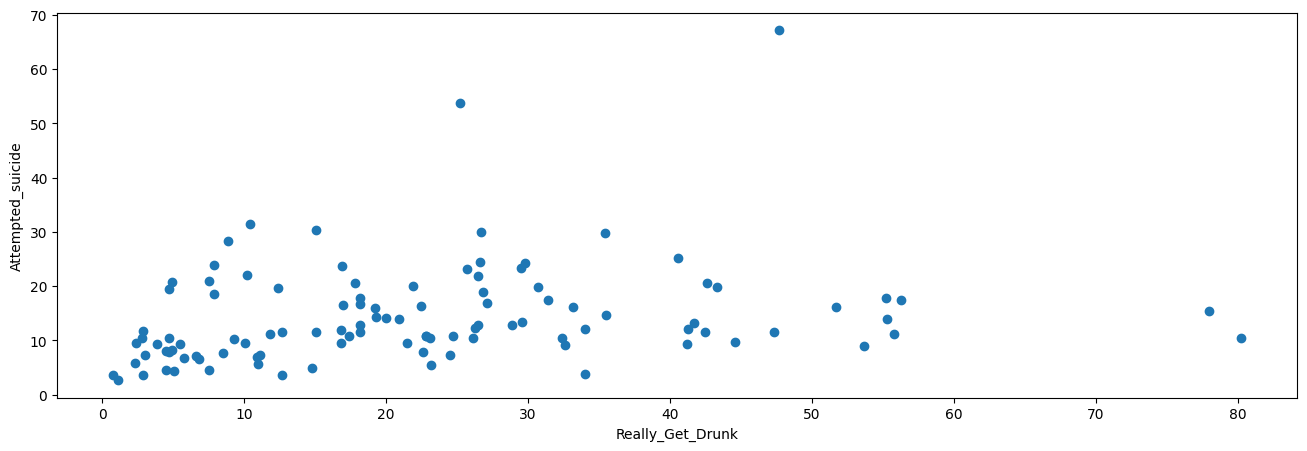

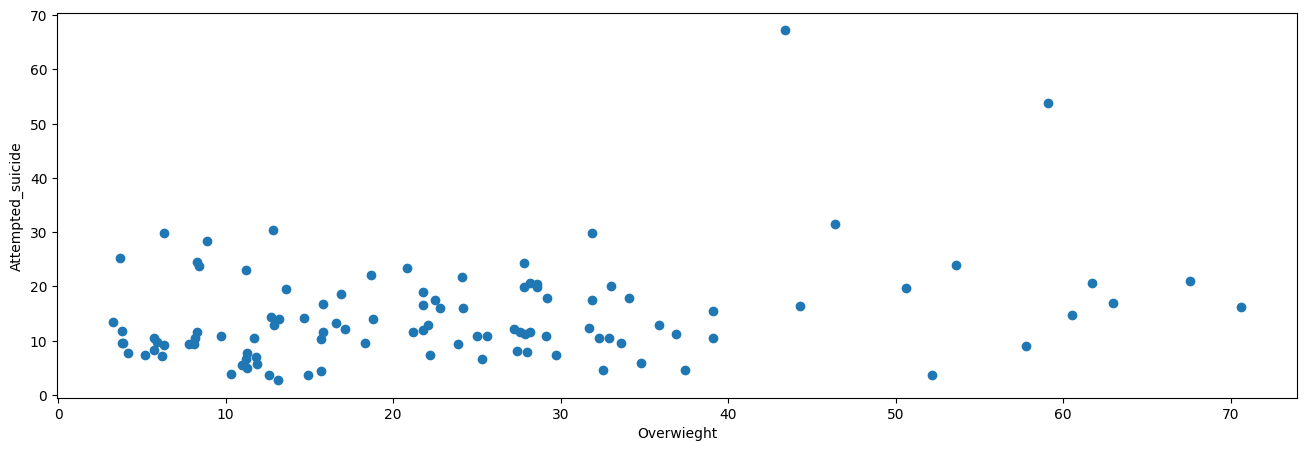

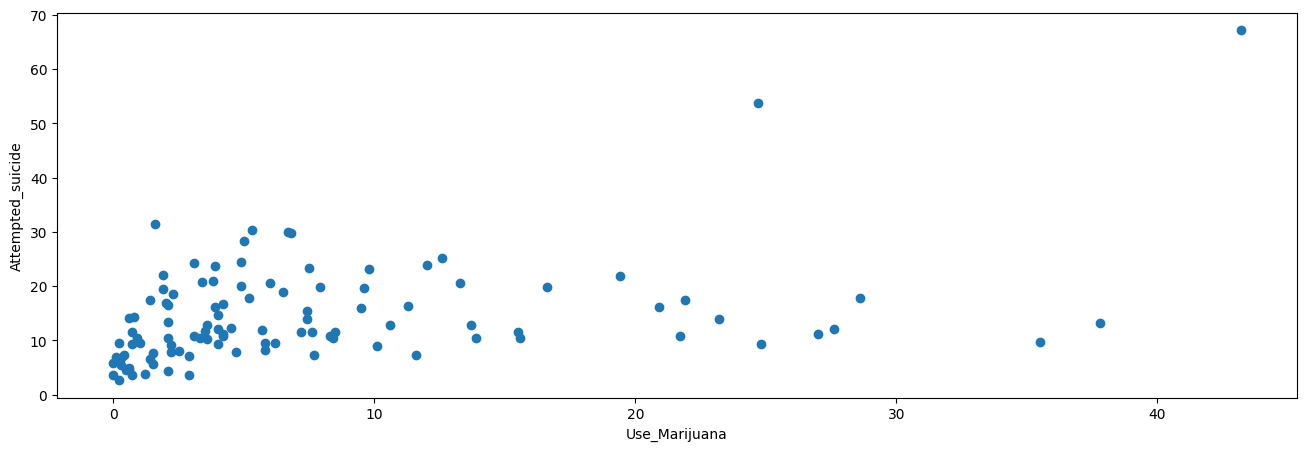

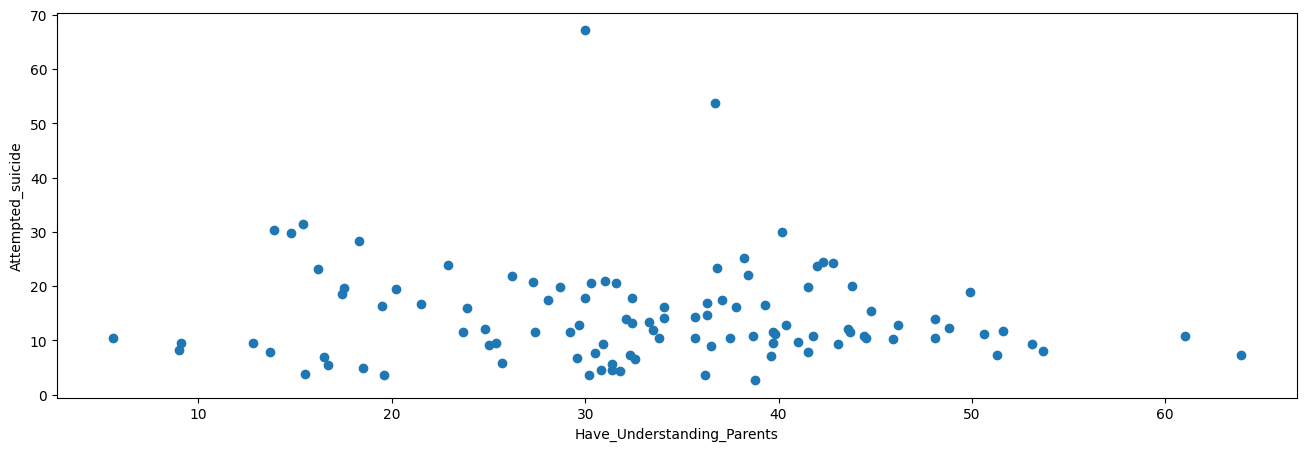

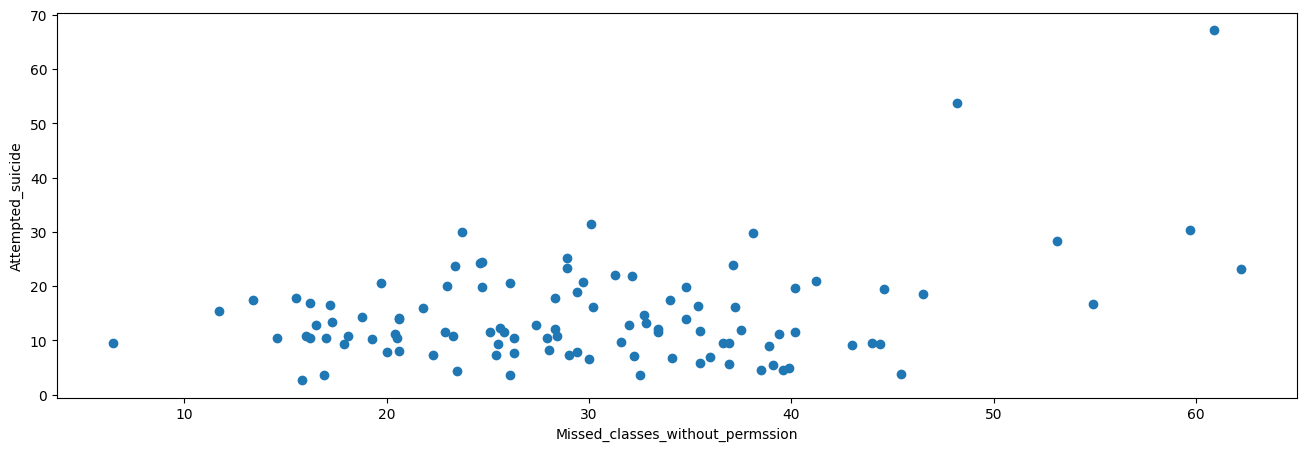

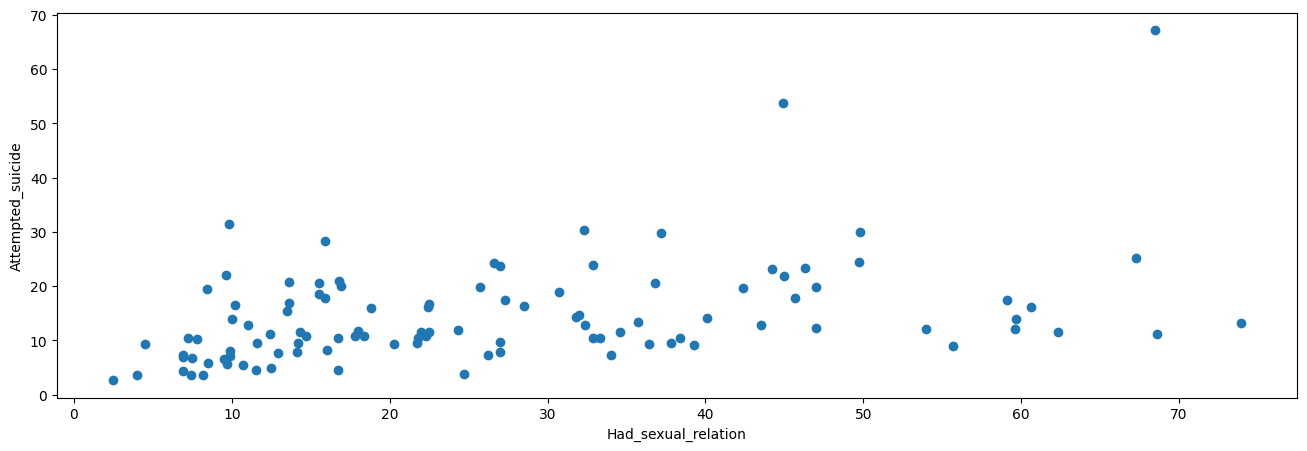

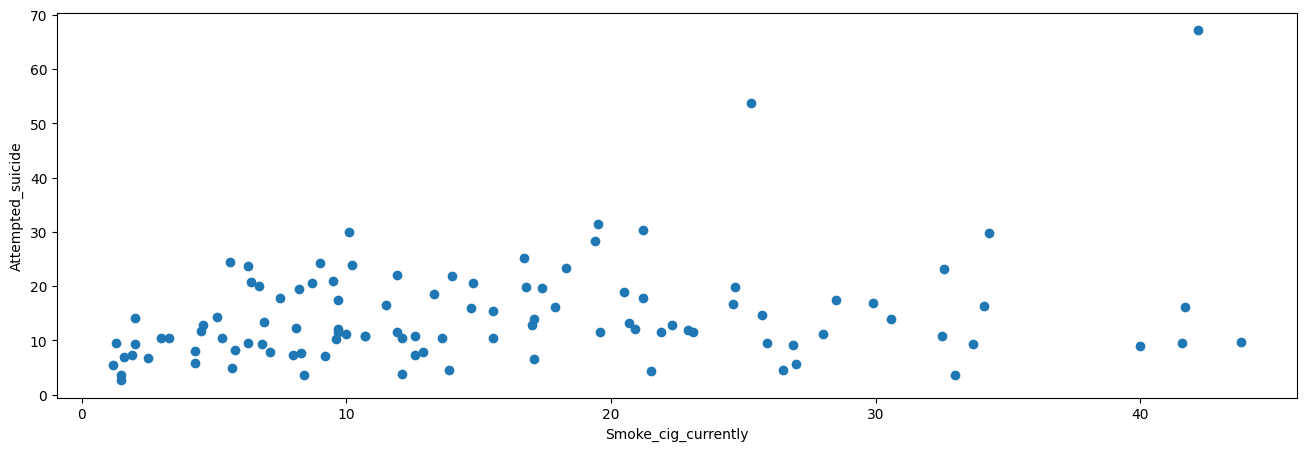

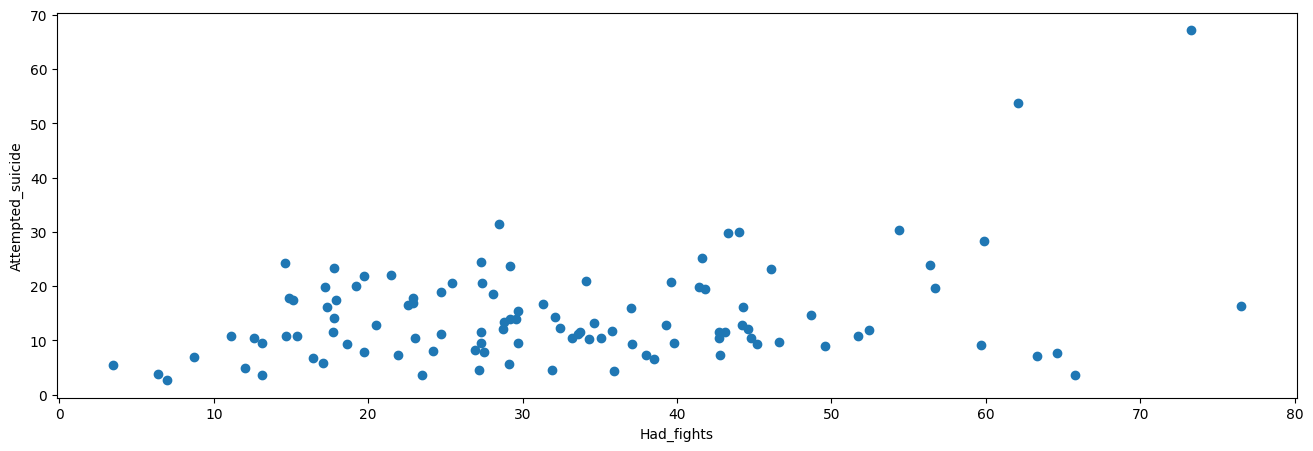

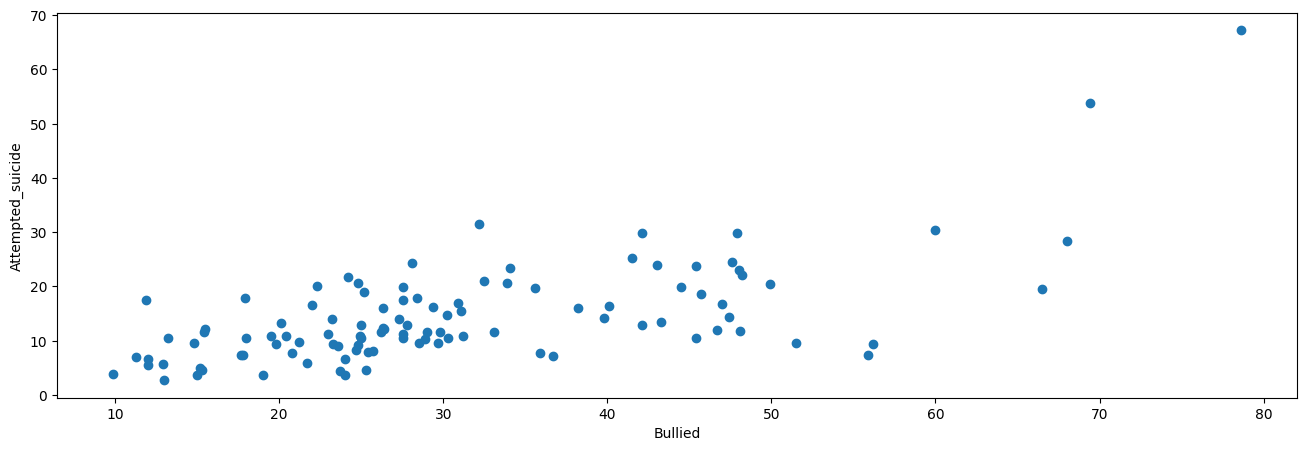

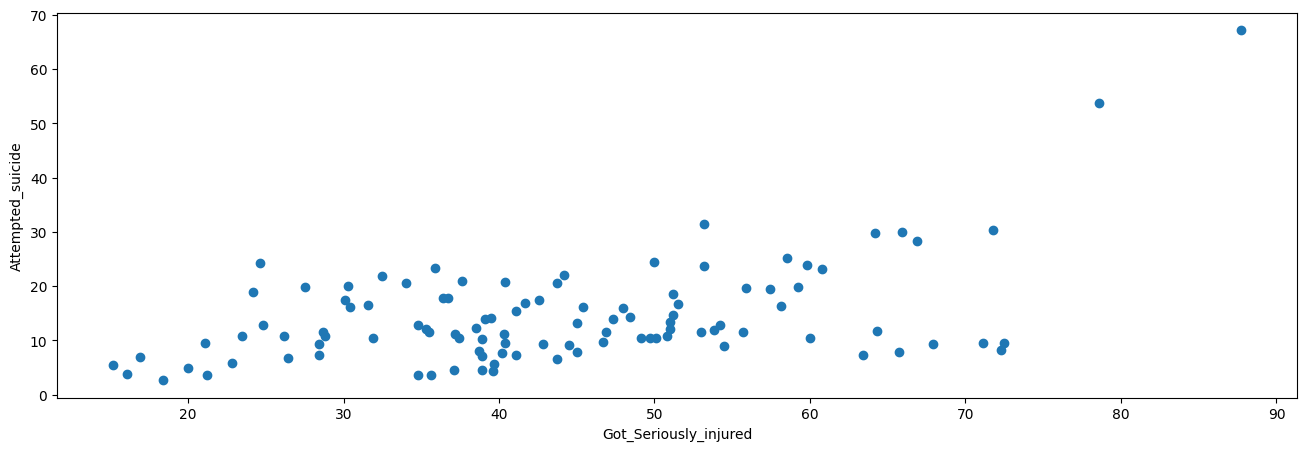

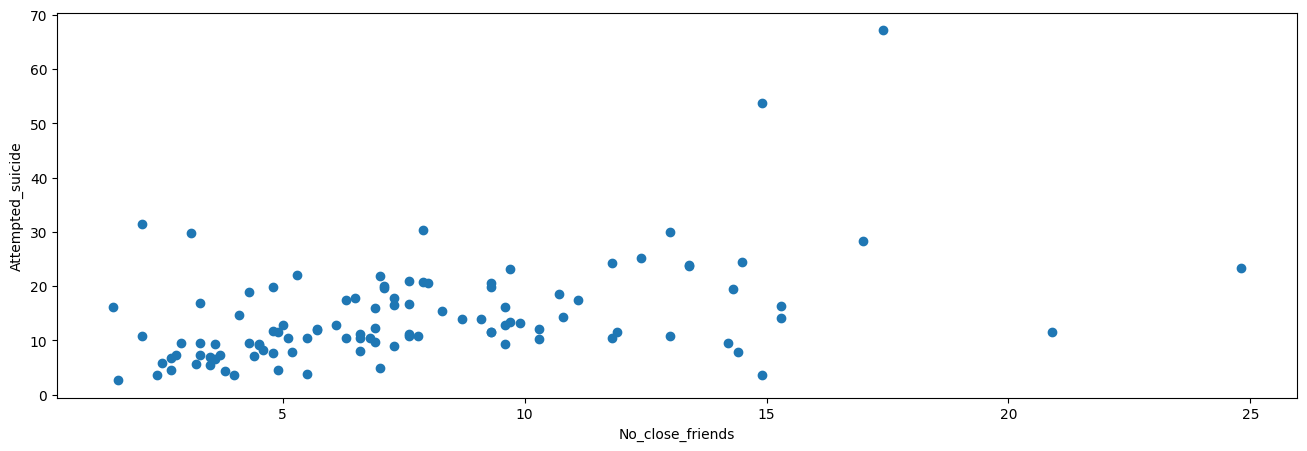

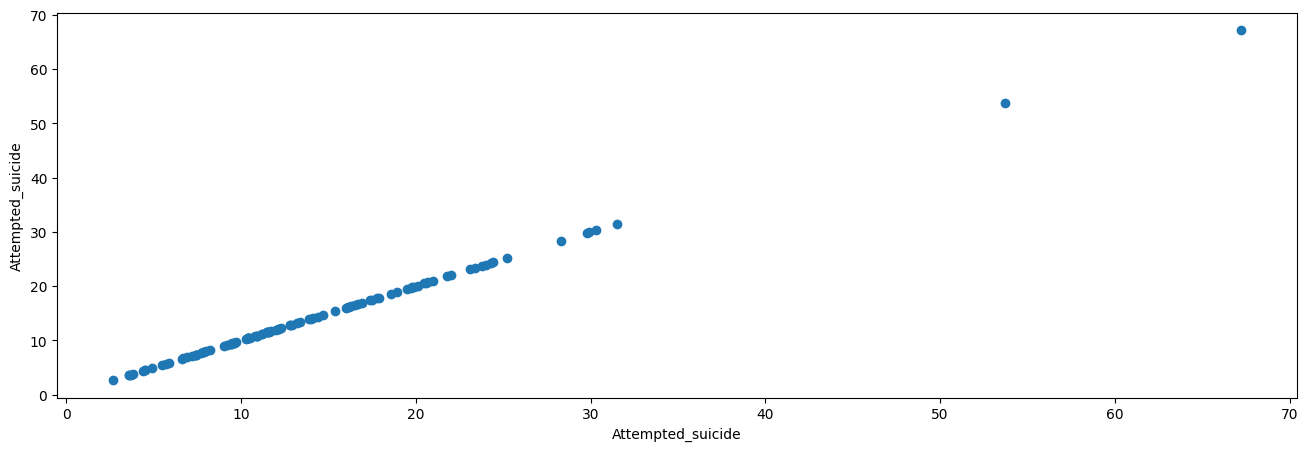

In [ ]:
for col in df_num.columns:
  fig, ax = plt.subplots(1,figsize=(16,5))
  plt.scatter(df[col], df['Attempted_suicide'])
  plt.xlabel(col)
  plt.ylabel('Attempted_suicide')

**INFERENCE**  
> 1)	Because of this one outlier on the extreme bottom right of the first chart, the distribution is getting affected.  
> 2)	All of our numerical variables have a moderate to slightly strong positive relationship with the class label Attempted_suicide which indicates that all these variables do have a significant effect on the rate of suicide attempts.  
> 3)	The data points are not too dense and hence there could be varied response recorded.


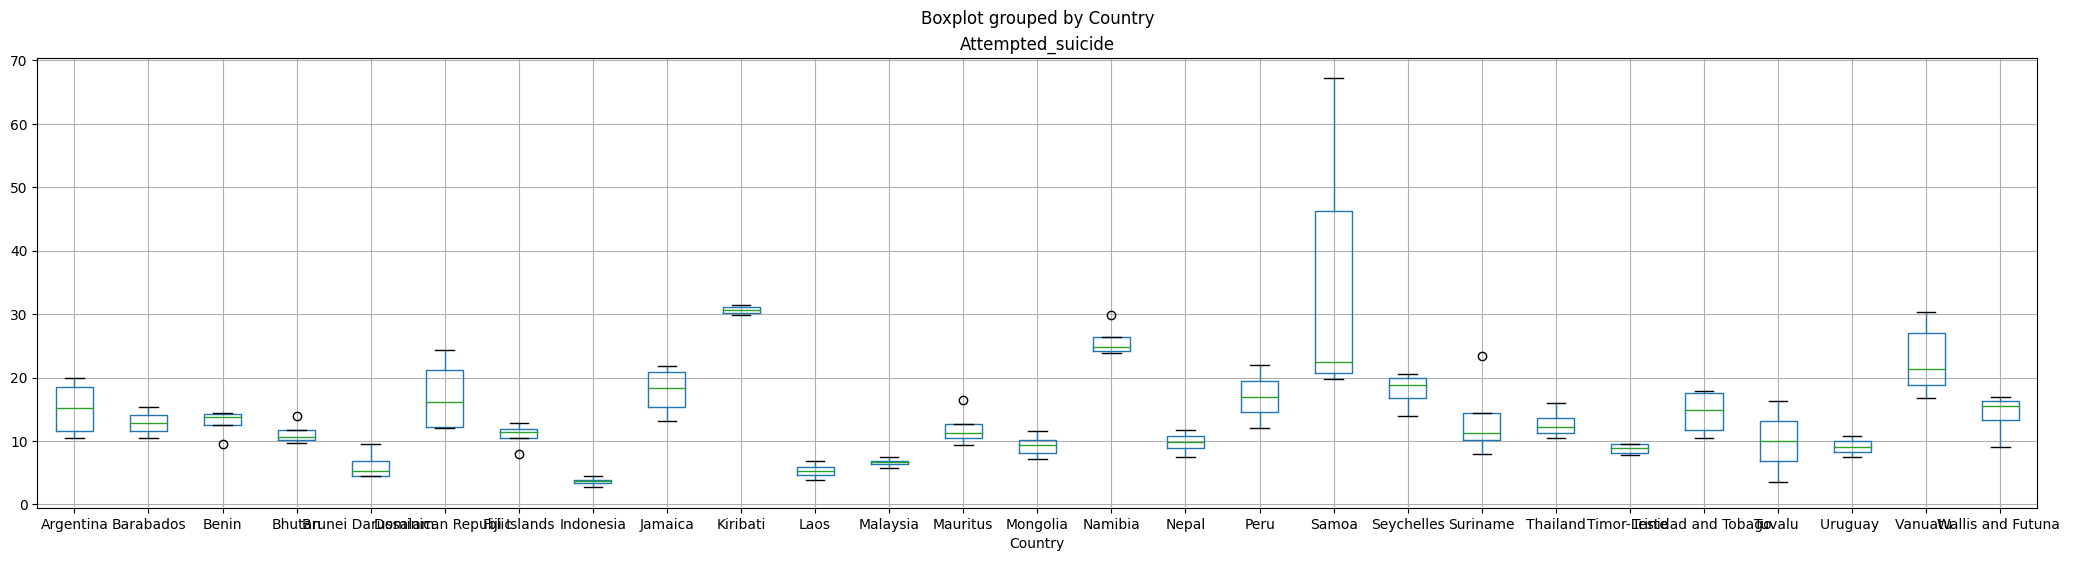

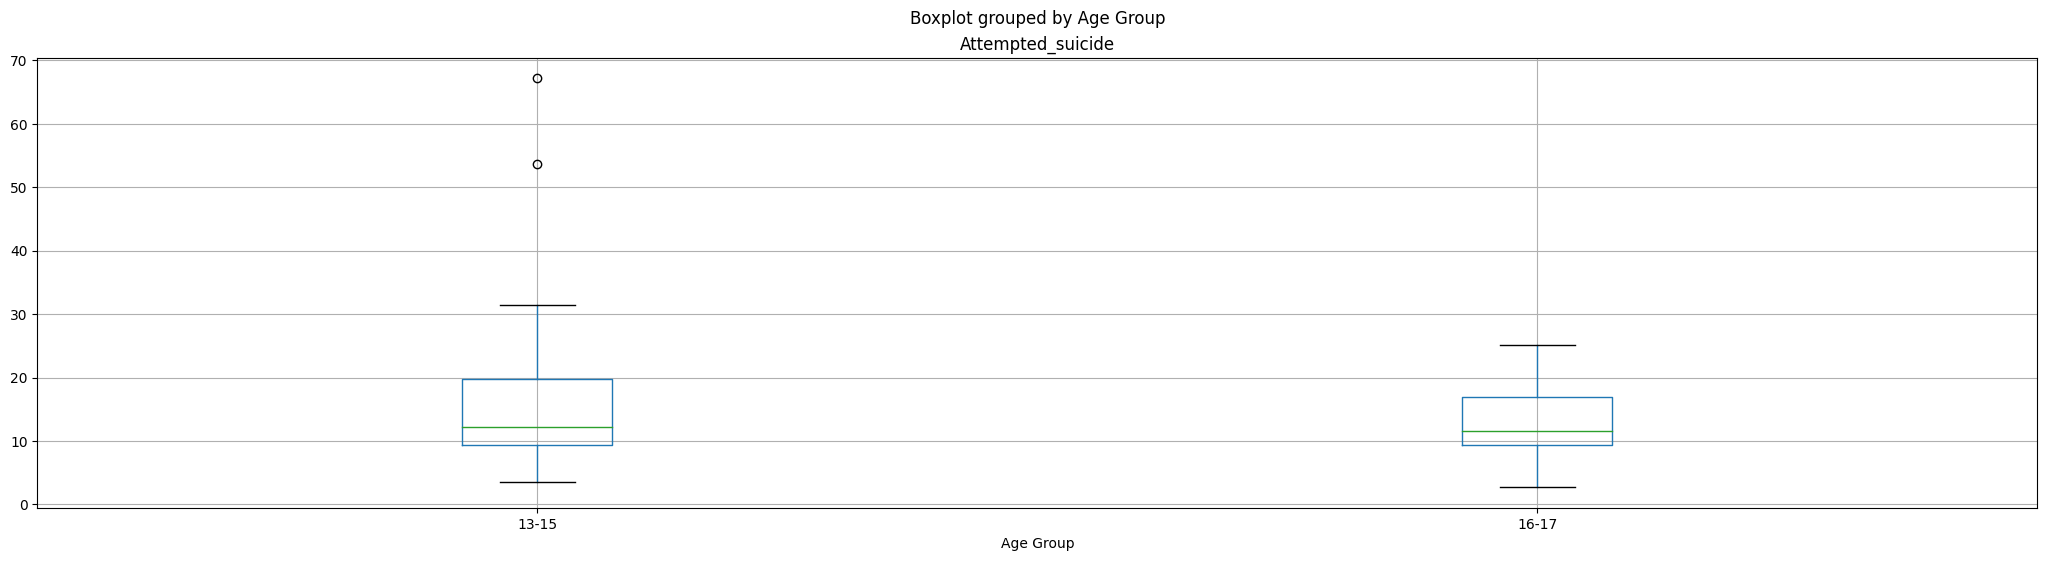

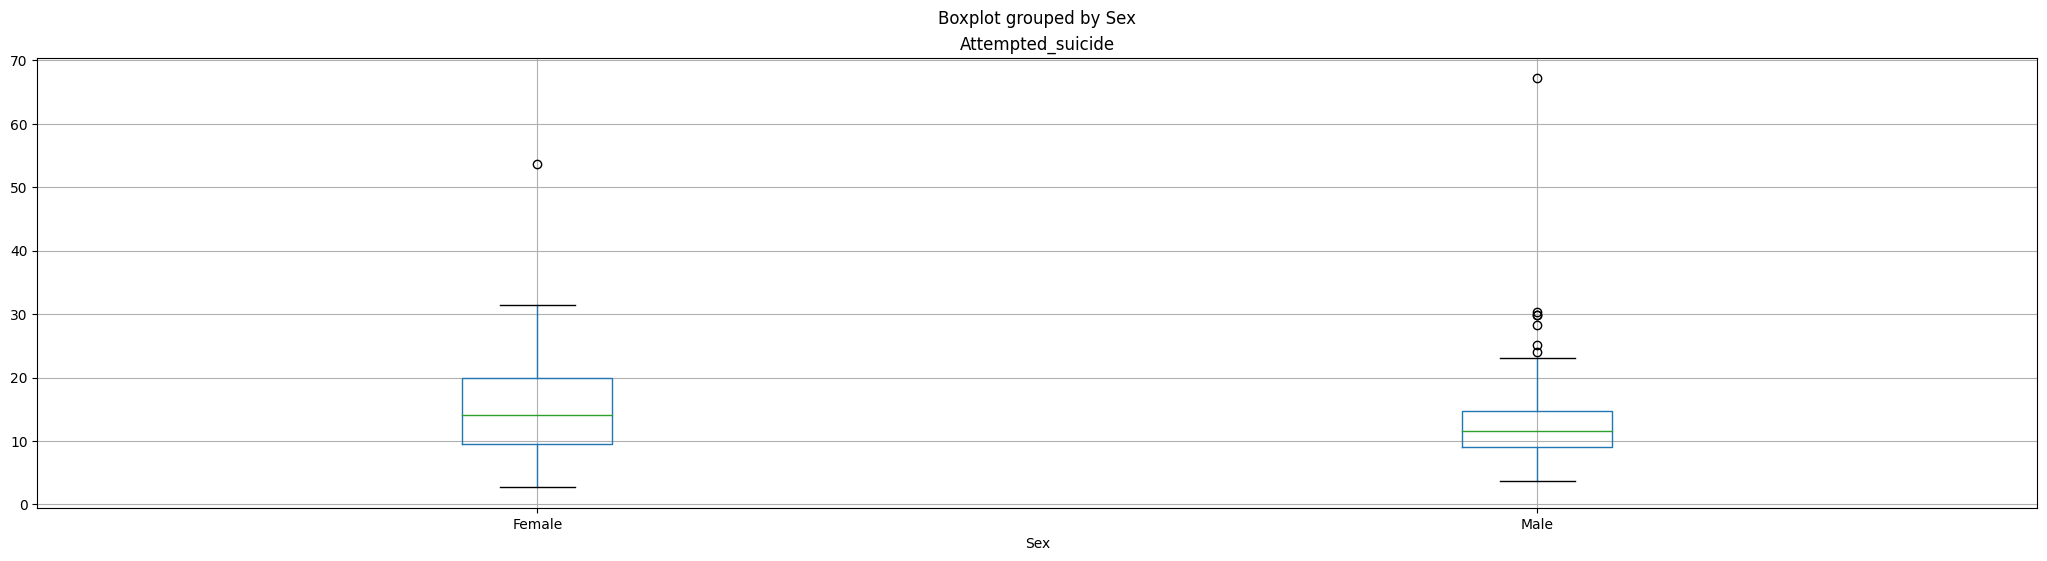

In [ ]:
for col in df_cat.columns:
  df.boxplot(column = 'Attempted_suicide', by = col,figsize=(25,6))

**INFERENCE**  
> 1)	The median suicidal rate is pretty much the same for both the sexes. But, the range of females is more.  
> 2)	The median suicidal rate is pretty much the same for both the age groups. But, the range of 13-15 age group is more.  
> 3)	The highest median suicidal rate is for Kiribati although the range of people is pretty much less comparatively and its the vice versa for Samoa.


### Feature Engineering

Feature engineering is the most important technique used in creating machine learning models. Feature Engineering is a basic term used to cover many operations that are performed on the variables(features)to fit them into the algorithm. It helps in increasing the accuracy of the model thereby enhances the results of the predictions.   

Feature Engineered machine learning models perform better on data than basic machine learning models. The following aspects of feature engineering are as follows:  
> 1)	Feature Scaling: It is done to get the features on the same scale( for eg. Euclidean distance).  
> 2)	Feature Transformation: It is done to normalize the data(feature) by a function.  
> 3)	Feature Construction: It is done to create new features based on original descriptors to improve the accuracy of the predictive model.  
> 4)	Feature Reduction. : It is done to improve the statistical distribution and accuracy of the predictive model.


#### Feature Transformation

Based on our Univariate Analysis we will be applying moderate transformations as our data is not highly skewed except for one variable with very high skewness because of one outlier which we will treat by removing it a sin one observation from the whole data.

For column **Attempted_suicide**:

In [ ]:
max(df['Attempted_suicide'])

67.2

In [ ]:
med = df['Attempted_suicide'].median()

In [ ]:
df['Attempted_suicide'].replace(67.2,med,inplace=True)

In [ ]:
max(df['Attempted_suicide'])

53.7

In [ ]:
med = df['Attempted_suicide'].median()

In [ ]:
df['Attempted_suicide'].replace(53.7,med,inplace=True)

<Axes: xlabel='Attempted_suicide'>

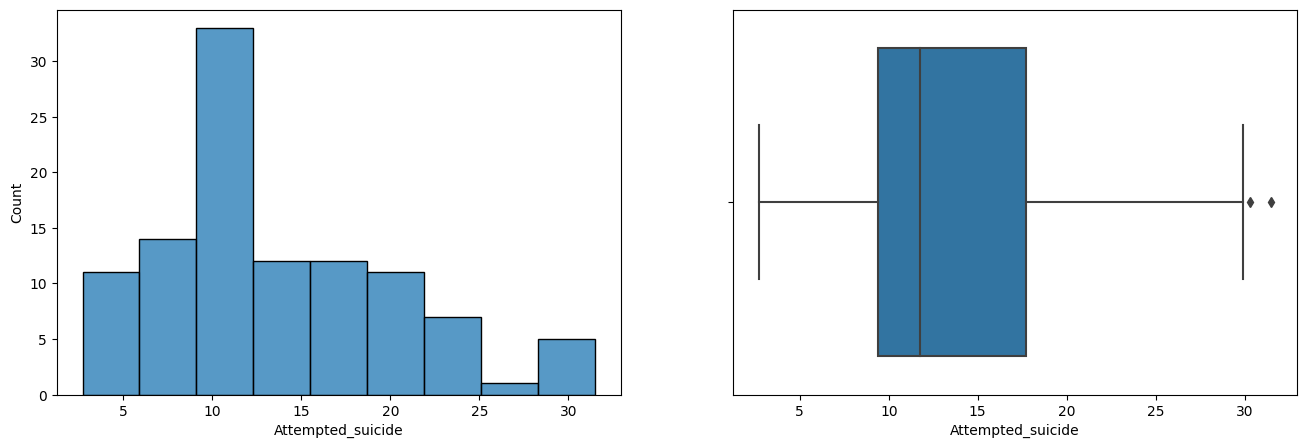

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['Attempted_suicide'], ax=ax[0])
sns.boxplot(data=df, x=df['Attempted_suicide'], ax=ax[1])

For column **Currently_Drink_Alcohol**:

In [ ]:
max(df['Currently_Drink_Alcohol'])

548.0

This value could be 54.8 so it could be some data entry level

In [ ]:
df['Attempted_suicide'].replace(548.0,med,inplace=True)

Text(0, 0.5, 'Attempted_suicide')

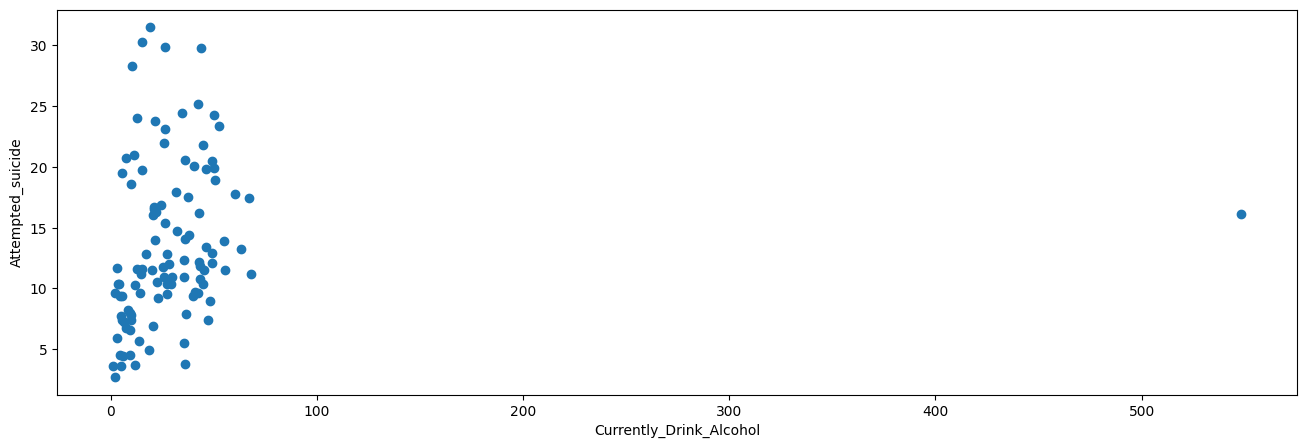

In [ ]:
fig, ax = plt.subplots(1,figsize=(16,5))
plt.scatter(df['Currently_Drink_Alcohol'], df['Attempted_suicide'])
plt.xlabel('Currently_Drink_Alcohol')
plt.ylabel('Attempted_suicide')

<Axes: xlabel='Currently_Drink_Alcohol'>

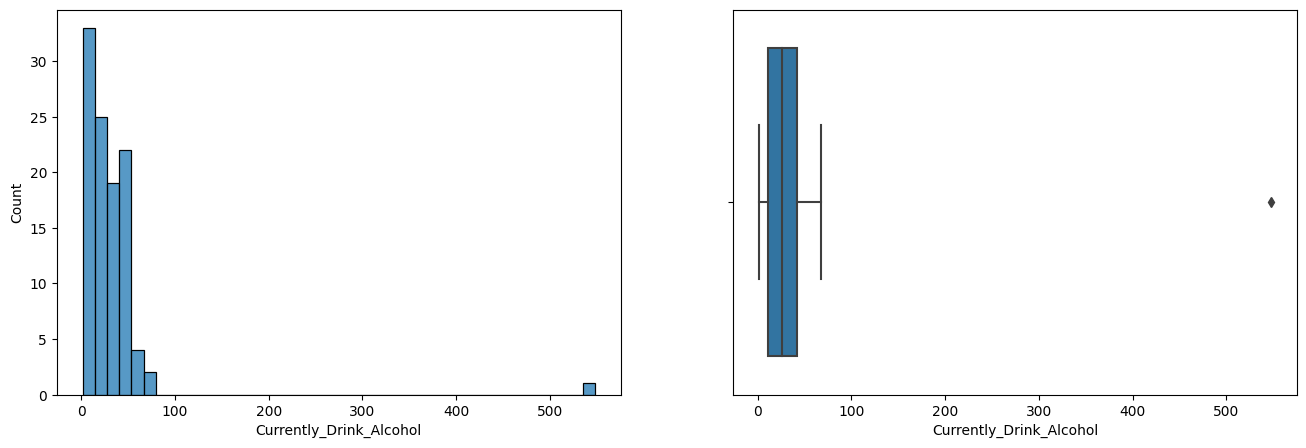

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['Currently_Drink_Alcohol'], ax=ax[0])
sns.boxplot(data=df, x=df['Currently_Drink_Alcohol'], ax=ax[1])

For column **Got_Seriously_injured**:

In [ ]:
max(df['Got_Seriously_injured'])

87.7

In [ ]:
med = df['Got_Seriously_injured'].median()
df['Got_Seriously_injured'].replace(87.7,med,inplace=True)

In [ ]:
df[df['Got_Seriously_injured'] == max(df['Got_Seriously_injured'])] = df['Got_Seriously_injured'].median()

Text(0, 0.5, 'Attempted_suicide')

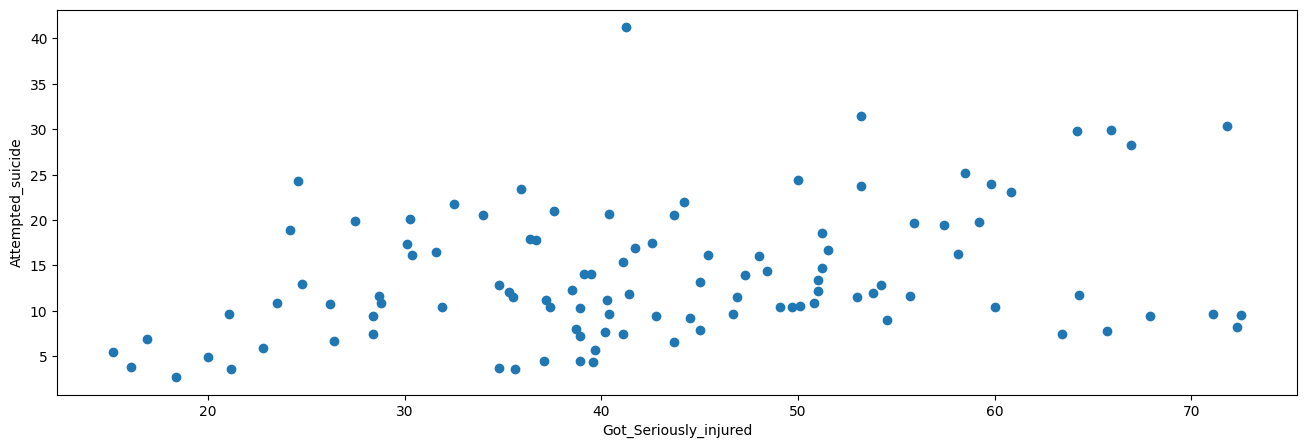

In [ ]:
fig, ax = plt.subplots(1,figsize=(16,5))
plt.scatter(df['Got_Seriously_injured'], df['Attempted_suicide'])
plt.xlabel('Got_Seriously_injured')
plt.ylabel('Attempted_suicide')

<Axes: xlabel='Got_Seriously_injured'>

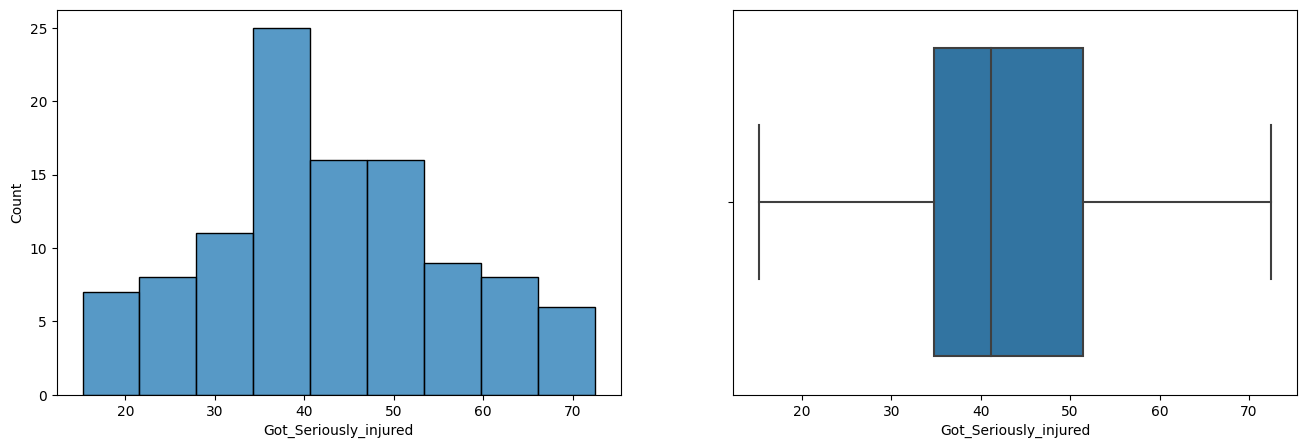

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['Got_Seriously_injured'], ax=ax[0])
sns.boxplot(data=df, x=df['Got_Seriously_injured'], ax=ax[1])

### Attribute Selection

Attribute subset Selection is a technique which is used for data reduction in data mining process. Data reduction reduces the size of data so that it can be used for analysis purposes more efficiently.  


##### Correlation Analysis

Correlational analysis is a statistical technique employed in measuring linear relationships between variables. A causal relationship between variables cannot be inferred using correlational analysis, regardless of the magnitude of the correlation observed.

In [ ]:
cor_df_num = df_num.corr()
cor_df_num

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
Year,1.000000,0.188742,0.091310,0.087593,0.168638,0.024212,-0.117785,0.216648,-0.002095,-0.233693,-0.255873,-0.125611,0.132952,-0.165606
Currently_Drink_Alcohol,0.188742,1.000000,0.311971,0.037212,0.318670,0.085079,0.002931,0.418399,0.141111,0.036944,-0.032602,-0.012972,0.131297,0.098731
Really_Get_Drunk,0.091310,0.311971,1.000000,0.191082,0.604226,0.199064,0.029132,0.674573,0.513520,0.052409,0.013765,0.066561,0.206292,0.235646
Overwieght,0.087593,0.037212,0.191082,1.000000,0.121040,0.092736,0.063789,0.083223,0.239976,0.189777,-0.011707,-0.050310,0.053527,0.288114
Use_Marijuana,0.168638,0.318670,0.604226,0.121040,1.000000,0.105225,0.261242,0.675593,0.551950,0.346987,0.155149,0.310927,0.266877,0.403062
Have_Understanding_Parents,0.024212,0.085079,0.199064,0.092736,0.105225,1.000000,-0.483356,0.080762,-0.112879,-0.077071,-0.043389,-0.221525,-0.000703,-0.081001
Missed_classes_without_permssion,-0.117785,0.002931,0.029132,0.063789,0.261242,-0.483356,1.000000,0.296897,0.500790,0.395450,0.353801,0.368259,0.086721,0.341590
Had_sexual_relation,0.216648,0.418399,0.674573,0.083223,0.675593,0.080762,0.296897,1.000000,0.440192,0.293354,0.244234,0.351281,0.405993,0.405801
Smoke_cig_currently,-0.002095,0.141111,0.513520,0.239976,0.551950,-0.112879,0.500790,0.440192,1.000000,0.413805,0.158853,0.379659,0.063804,0.270299
Had_fights,-0.233693,0.036944,0.052409,0.189777,0.346987,-0.077071,0.395450,0.293354,0.413805,1.000000,0.533894,0.666807,0.304187,0.338233


<Axes: >

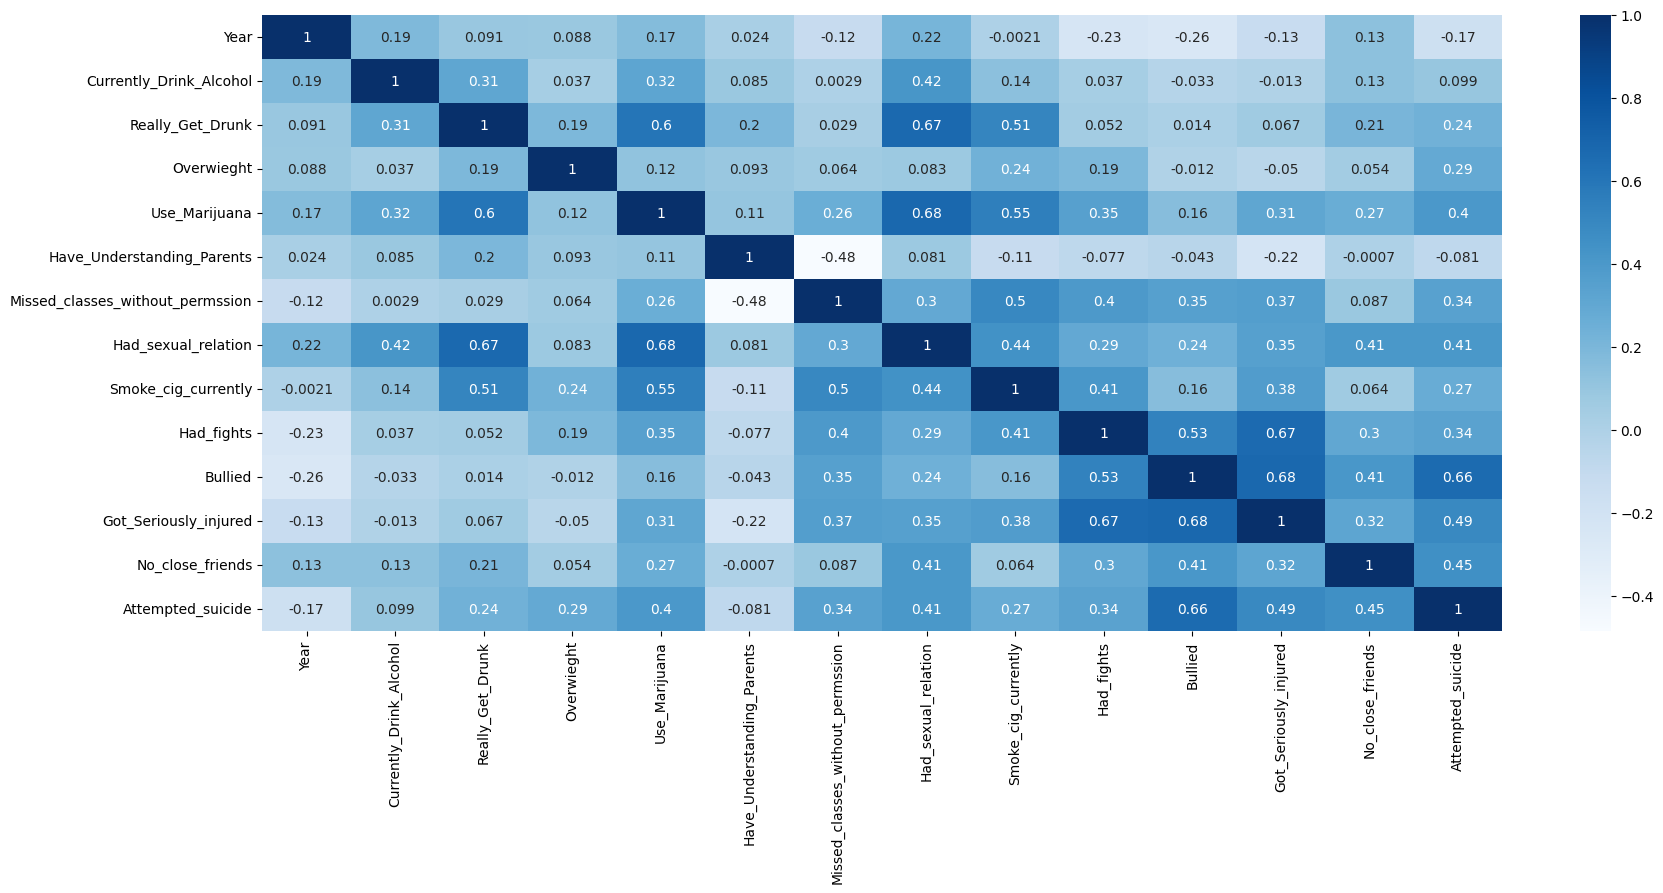

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(cor_df_num,annot=True,cmap='Blues')

The features of interest are those which have a correlation coefficient close to +1 or -1. Any value that above 0.65 or less than -0.65 will be considered.

### Diagnostic Analysis

Since we have numerical data that is highly affecting our class label Attempted_Suicide and our few categorical data, let us dive deep into the Root Cause Analysis .

**Q1 : Do overweight people get bullied more often based on country?**

In [ ]:
df.groupby(['Overwieght','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = False)

,,Attempted_suicide
Overwieght,Bullied,
41.25,41.25,41.25
46.40,32.20,31.50
12.80,60.00,30.30
6.30,47.90,29.90
31.90,42.10,29.80
...,...,...
10.30,9.90,3.80
12.60,24.00,3.70
52.20,15.00,3.60


From the output, we can conclude that if someone has an overweight problem and got frequently bullied, there is a possibility that they will attempt suicide. In the reverse condition, when someone who has an overweight problem and not getting bullied. It is a small chance that they will be attempting suicide. Furthermore, these are the most cases that highlight the most suicidal cases around the world, as educated people we need to understand their problems and help them by not bullying them. Support them through thin and thick and from such small things like that, we can make their confidence goes up and make them settle very well in their life.

**Q2 : What age group of kids that had sexual relation attempted suicide?**

In [ ]:
df.groupby(['Age Group','Had_sexual_relation'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

Attempted_suicide
Age Group Had_sexual_relation                   
16-17     2.50                              2.70
13-15     4.00                              3.60
          8.20                              3.60
16-17     7.40                              3.70
          24.70                             3.80
...                                          ...
13-15     37.20                            29.80
          49.80                            29.90
          32.30                            30.30
          9.80                             31.50
41.25     41.25                            41.25

[97 rows x 1 columns]

From the output, we can see that Age group of range 13-15 with higher  sexual relation rate, attempted more suicide.

**Q3. What gender of teens that were overweight attempted suicide?**

In [ ]:
df.groupby(['Sex','Overwieght'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

Attempted_suicide
Sex    Overwieght                   
Female 13.10                    2.70
       14.90                    3.60
       52.20                    3.60
Male   12.60                    3.70
       10.30                    3.80
...                              ...
       8.90                    28.30
       31.90                   29.80
       12.80                   30.30
Female 46.40                   31.50
41.25  41.25                   41.25

[100 rows x 1 columns]

From the output, females who are overweight as compared to the ones who are not, attempted suicide more often.

**Q4. Based on gender did they commit suicide if they had no friends?**

In [ ]:
df.groupby(['Sex','No_close_friends'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

Attempted_suicide
Sex    No_close_friends                   
Female 1.60                           2.70
       2.40                           3.60
       14.90                          3.60
Male   4.00                           3.70
       3.80                           4.40
...                                    ...
       17.00                         28.30
       3.10                          29.80
       13.00                         29.90
       7.90                          30.30
41.25  41.25                         41.25

[86 rows x 1 columns]

There is not much evidence to prove that the teens either males or females attempted suicides if they had no close friends.

**Q5. Attempted Suicide Rate by country based on Gender**

In [ ]:
df.groupby(['Sex','Country'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

Attempted_suicide
Sex    Country                                
Female Indonesia                      3.150000
       Tuvalu                         3.600000
Male   Indonesia                      4.050000
       Laos                           4.350000
       Brunei Darussalam              4.500000
       Malaysia                       6.150000
Female Laos                           6.200000
       Malaysia                       7.050000
Male   Uruguay                        7.400000
Female Brunei Darussalam              7.750000
       Timor-Leste                    8.000000
Male   Mongolia                       8.033333
       Nepal                          8.400000
       Timor-Leste                    9.550000
Female Fiji Islands                   9.600000
Male   Suriname                       9.700000
       Bhutan                        10.300000
       Barabados                     10.400000
       Mauritus                      10.450000
Female Mongolia                      10.466667
       Uruguay                       10.800000
       Nepal                         11.050000
Male   Trinidad and Tobago           11.300000
       Argentina                     11.500000
Female Thailand                      11.650000
       Benin                         11.850000
Male   Wallis and Futuna             11.850000
       Peru                          12.000000
Female Bhutan                        12.150000
Male   Dominican Republic            12.200000
       Fiji Islands                  12.200000
Female Mauritus                      13.700000
Male   Thailand                      13.750000
       Benin                         13.900000
       Jamaica                       14.650000
Female Barabados                     15.400000
Male   Tuvalu                        16.300000
Female Wallis and Futuna             16.550000
Male   Seychelles                    16.850000
Female Suriname                      17.150000
       Trinidad and Tobago           17.700000
       Vanuatu                       18.266667
Male   Samoa                         18.516667
Female Argentina                     18.733333
       Seychelles                    19.150000
       Samoa                         20.850000
       Jamaica                       21.200000
       Peru                          22.000000
       Dominican Republic            22.200000
       Namibia                       24.100000
Male   Vanuatu                       27.233333
       Namibia                       27.550000
       Kiribati                      29.800000
Female Kiribati                      31.500000
41.25  41.25                         41.250000

On a general note, we see that be it any country, female teens attempted more suicides than male teens.

**Did teens had understanding parents if they less or more fights?**

In [ ]:
df.groupby(['Had_fights','Have_Understanding_Parents'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

,,Attempted_suicide
Had_fights,Have_Understanding_Parents,
7.00,38.80,2.70
13.10,36.20,3.60
65.80,19.60,3.60
23.50,30.20,3.70
6.40,15.50,3.80
...,...,...
43.30,14.80,29.80
44.00,40.20,29.90
54.40,13.90,30.30


On a general note we see that teens having less fights had more understanding parents than those who had more fights.

### Conclusion  

We can infer from the results that someone is more likely to attempt suicide if they have a weight problem and have been bullied regularly. When someone has an overweight problem but isn’t bullied, the situation is the opposite. There is a remote possibility that they will make an attempt at suicide.   

Furthermore, because these situations highlight the greatest number of suicides worldwide, we educated people need to comprehend their issues and support them rather than bully them. Support them through thick and thin, and by doing such little things, we can boost their self-esteem and help them adjust to life much more successfully.  

Finally, I must point out that many of these behaviors—using marijuana, getting excessively drunk, etc.—might not be the cause of suicide for many of those teenagers but rather we can use these metrics and beahiour patterns in teenagers to better understand their mental health. These behaviours if not monitored might lead to suicide attempts.


### References
* Objective: https://www.who.int/teams/noncommunicable-diseases/surveillance/systems-tools/global-school-based-student-health-survey/methodology  
* Data source : https://www.kaggle.com/datasets/kashishnaqvi/suicidal-behaviours-among-adolescents


### Outro  

The result or the output of every analysis is attached below to its corresponding code snippet in a clean and formatted manner. This marks the end of the assignment.  
Thank you!


In [ ]:
#Converting object data type to numeric type
df["Attempted_suicide"] = pd.to_numeric(df["Attempted_suicide"], errors="coerce") #converting object datatype to numeric

**Decision Tree Classifier**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some advantages of decision trees are:

1. Simple to understand and to interpret. Trees can be visualized.

1. Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

T3. he cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

4. Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

5. Able to handle multi-output problems.

6. Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

7. Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

8. Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df_orig = pd.read_csv("/content/GHSH_Pooled_Data1.csv")

# Make a copy of the original dataframe
df = df_orig.copy()

# Fill missing values with appropriate imputation strategies
df['Bullied'] = df['Bullied'].fillna(df['Bullied'].median())
df['Smoke_cig_currently'] = df['Smoke_cig_currently'].fillna(df['Smoke_cig_currently'].mean())

# Select the relevant columns for the decision tree model
columns = ['Smoke_cig_currently', 'Bullied', 'Country', 'Age Group', 'Sex', 'Have_Understanding_Parents']
df_selected = df[columns + ['Attempted_suicide']]

# Drop rows with missing values in any column
df_selected.dropna(inplace=True)

# Binarize the target variable based on a threshold
threshold = 0.5  # Adjust the threshold as needed
df_selected.loc[:, 'Attempted_suicide'] = (df_selected['Attempted_suicide'] > threshold).astype(int)

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df_selected, drop_first=True)

# Split the data into training and test sets
X = df_encoded.drop('Attempted_suicide', axis=1)
y = df_encoded['Attempted_suicide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



<ipython-input-46-f84ccd8f7b86>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)
<ipython-input-46-f84ccd8f7b86>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Attempted_suicide'] = (df_selected['Attempted_suicide'] > threshold).astype(int)
<ipython-input-46-f84ccd8f7b86>:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are no

The output provided indicates perfect performance for the decision tree classifier. The precision, recall, and F1-score are all 1.00 for the positive class (1). This means that the classifier correctly predicted all instances of the positive class, resulting in perfect accuracy and performance.

The macro average and weighted average of precision, recall, and F1-score are also 1.00, indicating overall excellent performance.

Therefore, based on the provided output, it seems that the decision tree classifier achieved perfect classification results for the given dataset.